In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import array
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [27]:
from google.colab import files
uploaded = files.upload()


In [28]:
!ls

drive  sample_data  sample_submission.csv  test.csv  train.csv


In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
trainData=pd.read_csv("train.csv")
trainData

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,WeightCategory
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15528,15528,Male,18.000000,1.700000,50.000000,no,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,2.000000,Sometimes,Public_Transportation,Insufficient_Weight
15529,15529,Male,18.000000,1.763101,55.523481,yes,yes,2.786008,3.000000,Sometimes,no,1.962646,yes,0.028202,1.561272,Sometimes,Public_Transportation,Insufficient_Weight
15530,15530,Female,19.010211,1.686936,49.660995,no,yes,1.053534,3.452590,Sometimes,no,1.000000,no,2.001230,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
15531,15531,Male,22.777890,1.805445,85.228116,yes,yes,2.000000,2.092179,Sometimes,no,2.452986,no,0.796770,0.000000,Sometimes,Public_Transportation,Overweight_Level_I


In [31]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15533 entries, 0 to 15532
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              15533 non-null  int64  
 1   Gender                          15533 non-null  object 
 2   Age                             15533 non-null  float64
 3   Height                          15533 non-null  float64
 4   Weight                          15533 non-null  float64
 5   family_history_with_overweight  15533 non-null  object 
 6   FAVC                            15533 non-null  object 
 7   FCVC                            15533 non-null  float64
 8   NCP                             15533 non-null  float64
 9   CAEC                            15533 non-null  object 
 10  SMOKE                           15533 non-null  object 
 11  CH2O                            15533 non-null  float64
 12  SCC                             

In [32]:
trainData.columns

Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS',
       'WeightCategory'],
      dtype='object')

In [33]:
trainData.dtypes

,0
id,int64
Gender,object
Age,float64
Height,float64
Weight,float64
family_history_with_overweight,object
FAVC,object
FCVC,float64
NCP,float64
CAEC,object


In [34]:
trainData.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,15533.000000,15533.000000,15533.000000,15533.000000,15533.000000,15533.000000,15533.000000,15533.000000,15533.000000
mean,7766.000000,23.816308,1.699918,87.785225,2.442917,2.760425,2.027626,0.976968,0.613813
std,4484.135201,5.663167,0.087670,26.369144,0.530895,0.706463,0.607733,0.836841,0.602223
min,0.000000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,3883.000000,20.000000,1.630927,66.000000,2.000000,3.000000,1.796257,0.007050,0.000000
50%,7766.000000,22.771612,1.700000,84.000000,2.342220,3.000000,2.000000,1.000000,0.566353
75%,11649.000000,26.000000,1.762921,111.600553,3.000000,3.000000,2.531456,1.582675,1.000000
max,15532.000000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [35]:
trainData.describe(include='object')

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,WeightCategory
count,15533,15533,15533,15533,15533,15533,15533,15533,15533
unique,2,2,2,4,2,2,3,5,7
top,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
freq,7783,12696,14184,13126,15356,15019,11285,12470,2983


# **EXPLORATORY DATA ANALYSIS**

**Target Variable Analysis**

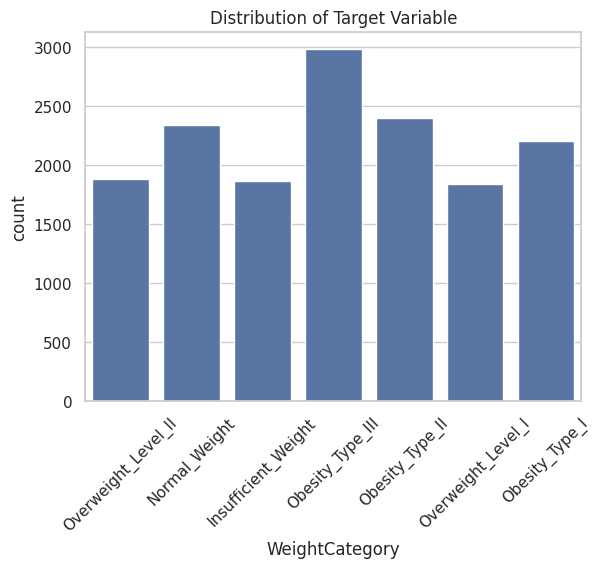

,proportion
WeightCategory,
Obesity_Type_III,0.192043
Obesity_Type_II,0.154703
Normal_Weight,0.150969
Obesity_Type_I,0.142085
Overweight_Level_II,0.121097
Insufficient_Weight,0.120389
Overweight_Level_I,0.118715


In [36]:
sns.countplot(x='WeightCategory', data=trainData)
plt.title("Distribution of Target Variable")
plt.xticks(rotation=45)
plt.show()

trainData['WeightCategory'].value_counts(normalize=True)

The target variable WeightCategory shows a fairly uniform distribution across all seven categories, with class proportions ranging from 11.9% to 19.2%. The maximum-to-minimum ratio is approximately 1.6:1, indicating that the dataset is reasonably balanced. Hence, no major imbalance handling is required.

**Univariate Analysis for Numerical Variables**

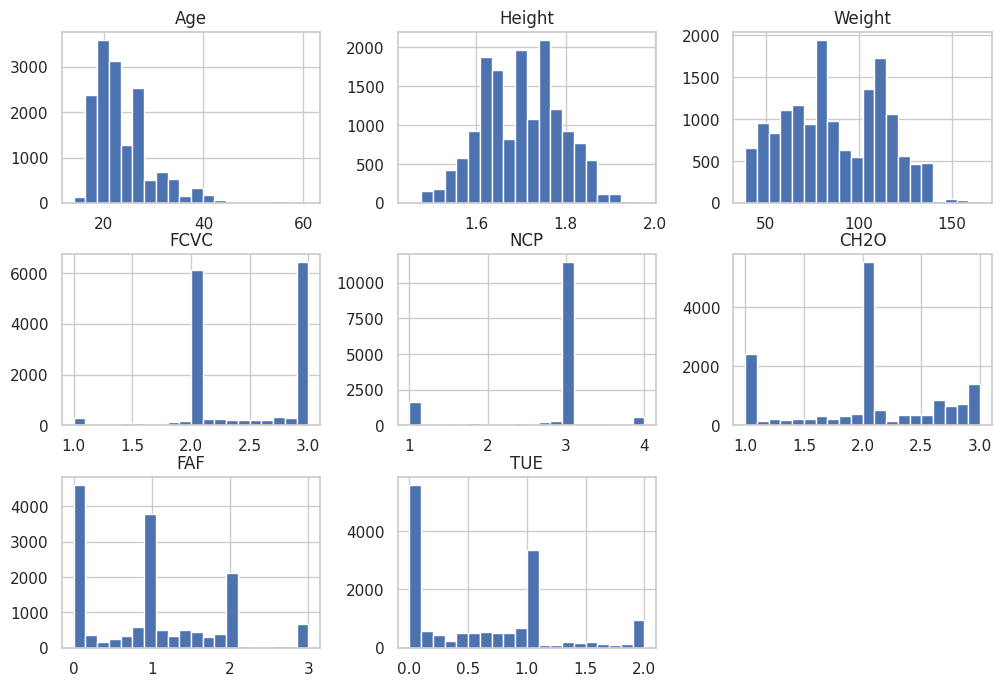

In [37]:
numeric_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
trainData[numeric_cols].hist(bins=20, figsize=(12, 8))
plt.show()

* The **Age** distribution is **right-skewed**, with the majority of participants falling between **18 and 25 years**, indicating that the dataset is dominated by young adults.

* **Height** follows an approximately **normal distribution**, centered around **1.65 to 1.75 meters**, suggesting a realistic spread across participants.

* **Weight** is **moderately right-skewed**, with most individuals weighing between **50 and 100 kilograms**, and a few higher values that likely represent genuinely obese participants.

* **FCVC (Frequency of Vegetable Consumption)** shows a **bimodal pattern**, where most individuals have values around **2 or 3**, implying regular vegetable consumption among participants.

* **NCP (Number of Main Meals)** displays a strong concentration at **3 meals per day**, which aligns with typical eating habits.

* **CH2O (Daily Water Intake)** is **mildly right-skewed**, with most participants consuming about **2 liters of water per day**.

* **FAF (Physical Activity Frequency)** has a **multimodal distribution**, suggesting a wide range of exercise habits, from no activity to frequent exercise.

* **TUE (Time Using Technology Devices)** is **highly right-skewed**, showing that most participants spend **less than one hour per day** using technology.


**A few outliers are present in Age and Weight, but they appear to be genuine rather than data entry errors.**

**Overall, all numerical features show logical and interpretable distributions, with only mild skewness in some variables that can be handled during model preparation.**

**Univariate Analysis for Categorical Variables**

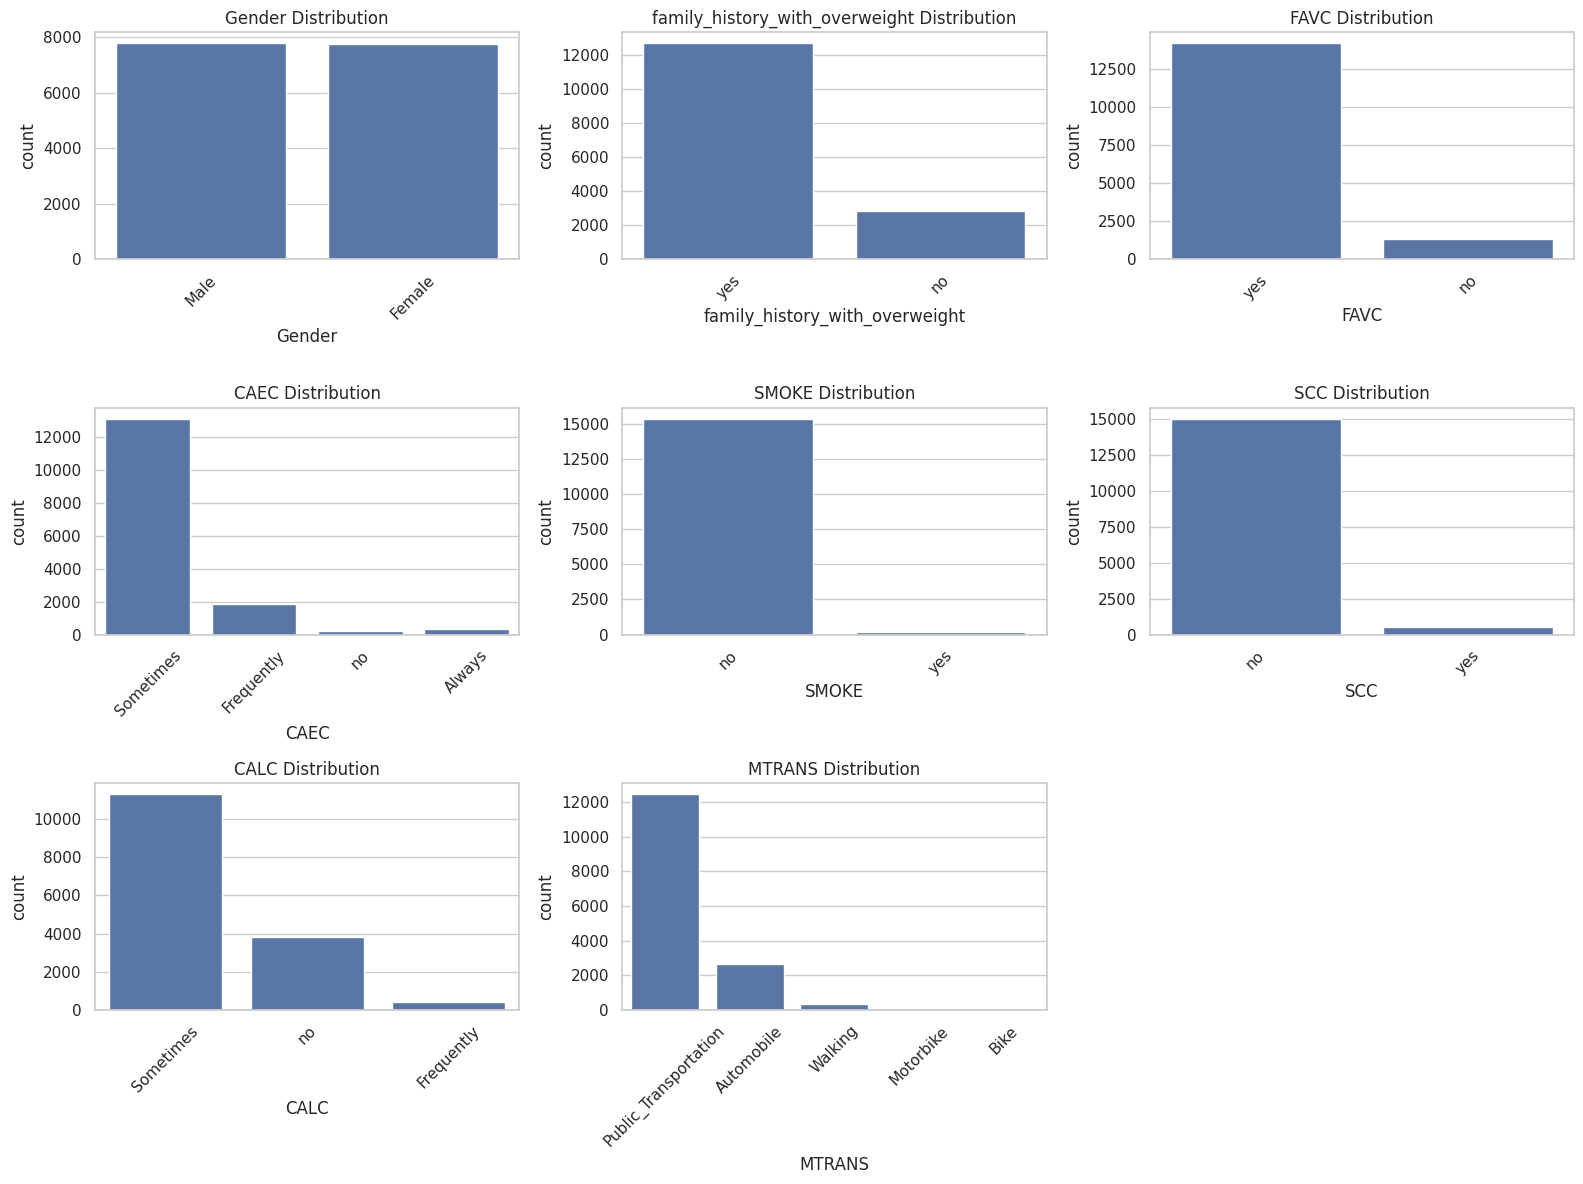

In [38]:
cat_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC',
            'SMOKE', 'SCC', 'CALC', 'MTRANS']

plt.figure(figsize=(16, 12))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=col, data=trainData)
    plt.title(f"{col} Distribution")
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()


In [39]:
cat_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC',
            'SMOKE', 'SCC', 'CALC', 'MTRANS']

for col in cat_cols:
    print(f"\n{'='*40}")
    print(f"▶ {col} Distribution")
    print(f"{'='*40}")
    counts = trainData[col].value_counts(normalize=True) * 100
    for cat, val in counts.items():
        print(f"{cat:<25}: {val:5.2f}%")



▶ Gender Distribution
Male                     : 50.11%
Female                   : 49.89%

▶ family_history_with_overweight Distribution
yes                      : 81.74%
no                       : 18.26%

▶ FAVC Distribution
yes                      : 91.32%
no                       :  8.68%

▶ CAEC Distribution
Sometimes                : 84.50%
Frequently               : 11.96%
Always                   :  2.23%
no                       :  1.31%

▶ SMOKE Distribution
no                       : 98.86%
yes                      :  1.14%

▶ SCC Distribution
no                       : 96.69%
yes                      :  3.31%

▶ CALC Distribution
Sometimes                : 72.65%
no                       : 24.73%
Frequently               :  2.62%

▶ MTRANS Distribution
Public_Transportation    : 80.28%
Automobile               : 17.18%
Walking                  :  2.19%
Motorbike                :  0.19%
Bike                     :  0.15%


* The **Gender distribution is nearly equal**, with 50.11% males and 49.89% females, indicating a perfectly balanced gender representation in the dataset.

* A large proportion **(81.74%) of individuals reported having a family history of overweight**, suggesting a strong hereditary influence among participants.

* The **majority (91.32%) of participants responded “yes”** to **FAVC (Frequent Consumption of High-Calorie Food)**, implying that most individuals regularly consume calorie-dense foods.

* For **CAEC (Consumption of Food Between Meals)**, **84.5% of respondents reported “Sometimes”**, while only 1.31% reported “no,” indicating that snacking between meals is a common habit.

* **SMOKE shows a clear pattern**, with **98.86% non-smokers** and only 1.14% smokers, suggesting that smoking is relatively uncommon in this population.

* In **SCC (Calories Monitoring)**, **96.69% of individuals do not monitor their calorie intake**, showing that calorie tracking is rare among participants.

* For **CALC (Alcohol Consumption**), **72.65% reported drinking “Sometimes”**, while 24.73% said “no”, indicating that moderate alcohol consumption is fairly common.

* Regarding **MTRANS (Mode of Transportation)**, the **vast majority (80.28%) use public transportation**, followed by automobiles (17.18%), while walking and biking are much less common.

**Overall Insights**

Most categorical variables are highly imbalanced, with one dominant category (e.g., FAVC = “yes”, SMOKE = “no”).

However, these distributions reflect realistic lifestyle behaviors rather than data issues.

Variables such as Gender are well-balanced, while others (e.g., SMOKE, SCC, MTRANS) may provide limited variability for model training.

The categorical data appears clean, with no evidence of inconsistent or erroneous category values.

**Bivariate Analysis for Numerical Variables**

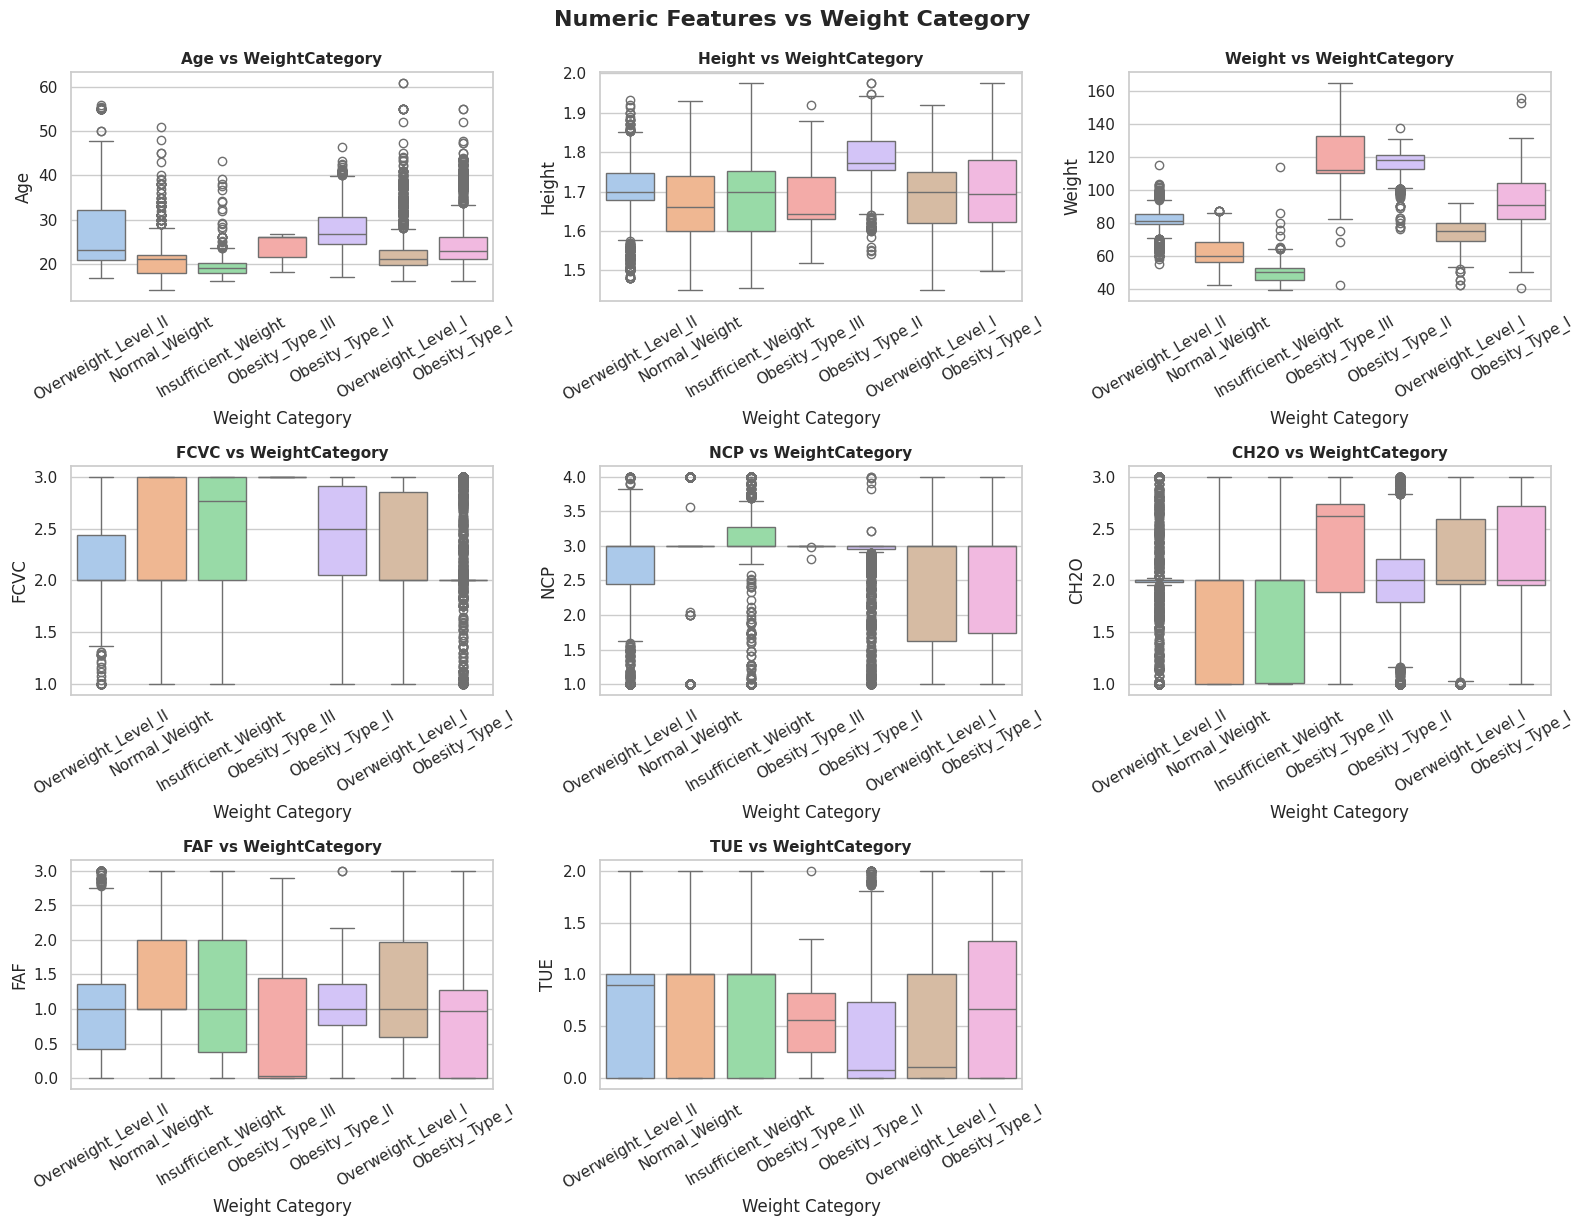

In [40]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(16, 12))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(
        x='WeightCategory',
        y=col,
        hue='WeightCategory',
        data=trainData,
        palette='pastel',
        legend=False
    )
    plt.title(f"{col} vs WeightCategory", fontsize=11, weight='bold')
    plt.xlabel("Weight Category")
    plt.ylabel(col)
    plt.xticks(rotation=30)
    plt.tight_layout()

plt.suptitle("Numeric Features vs Weight Category", fontsize=16, weight='bold', y=1.02)
plt.show()


**Bivariate Analysis for Categorical Variables**

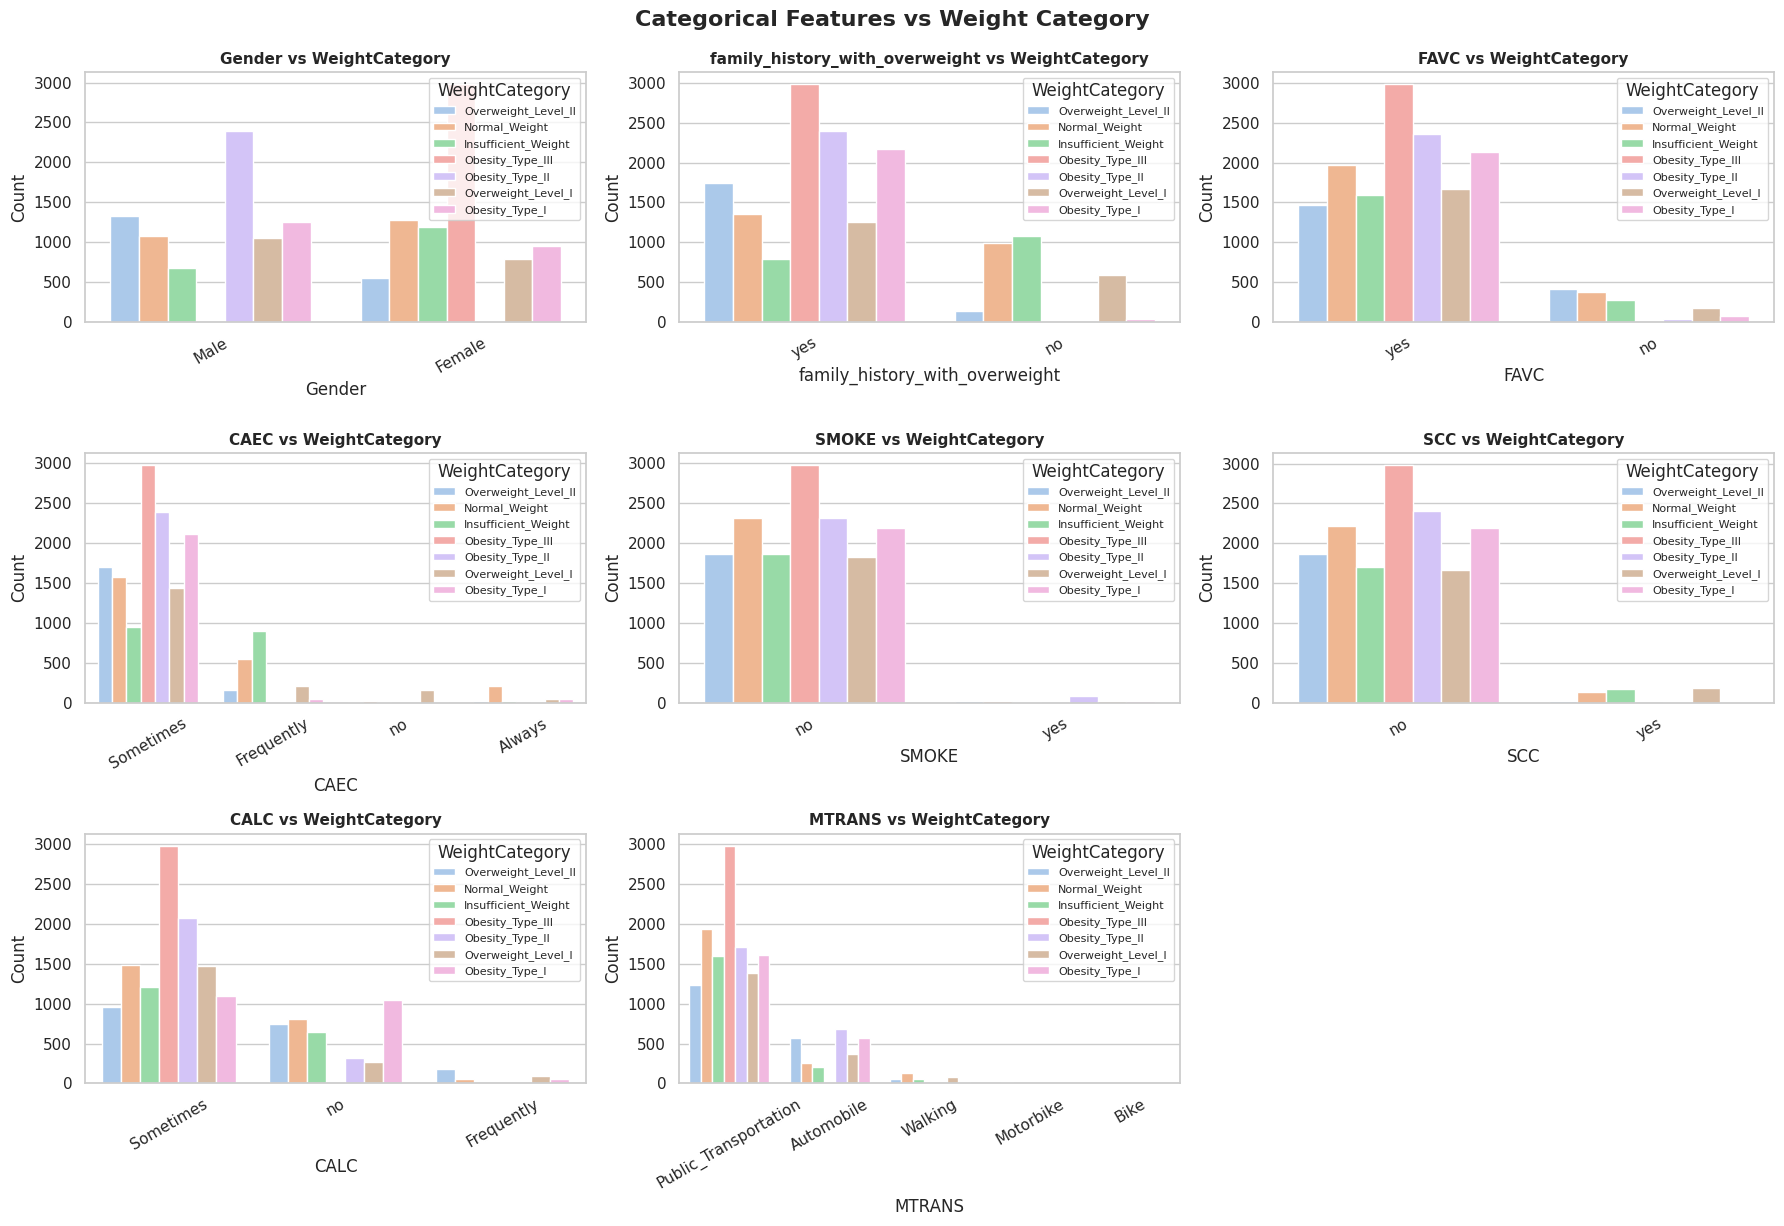

In [41]:
import math

sns.set_theme(style="whitegrid")

n_cols = 3
n_rows = math.ceil(len(cat_cols) / n_cols)

plt.figure(figsize=(6 * n_cols, 4 * n_rows))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(
        x=col,
        hue='WeightCategory',
        data=trainData,
        palette='pastel'
    )
    plt.title(f"{col} vs WeightCategory", fontsize=11, weight='bold')
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=30)
    plt.legend(title="WeightCategory", loc="upper right", fontsize=8)
    plt.tight_layout()

plt.suptitle("Categorical Features vs Weight Category", fontsize=16, weight='bold', y=1.02)
plt.show()


**Correlation Analysis**

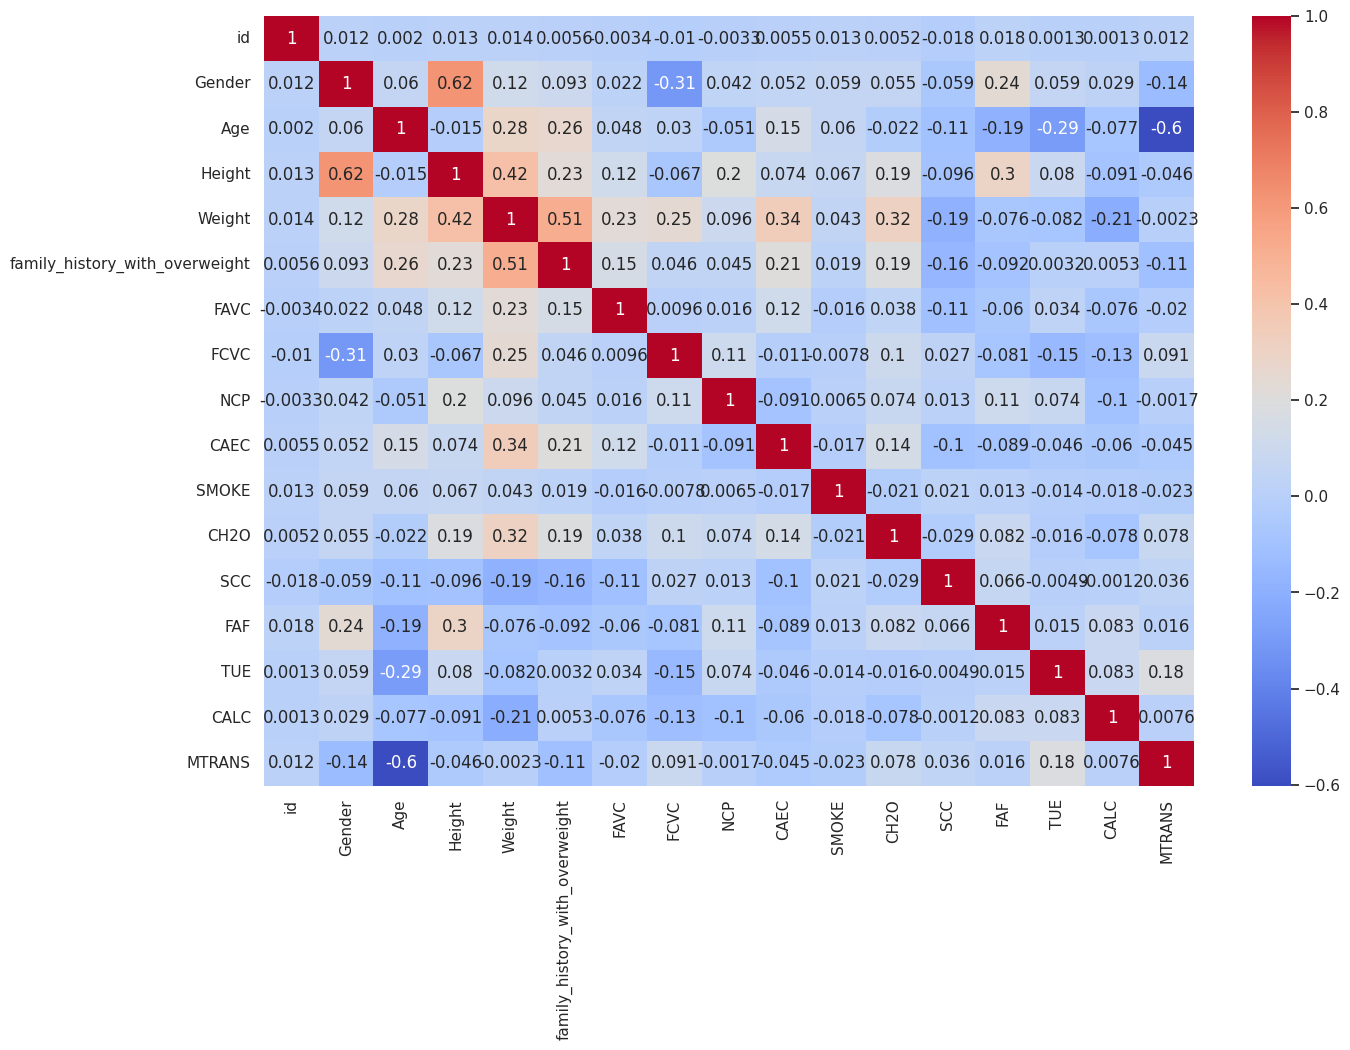

In [42]:
x=trainData.drop('WeightCategory',axis=1)
target=trainData["WeightCategory"]
target.head()
df_copy = x.copy()
categorical_cols = df_copy.select_dtypes(include='object').columns

for col in categorical_cols:
    df_copy[col] = LabelEncoder().fit_transform(df_copy[col])

plt.figure(figsize=(15,10))
sns.heatmap(df_copy.corr(), annot=True, cmap='coolwarm')
plt.show()

The above heatmap depicts the correlation between the features. There are no two features having high correlation between them. Hence none of the features were dropped.

**Outlier Detection**

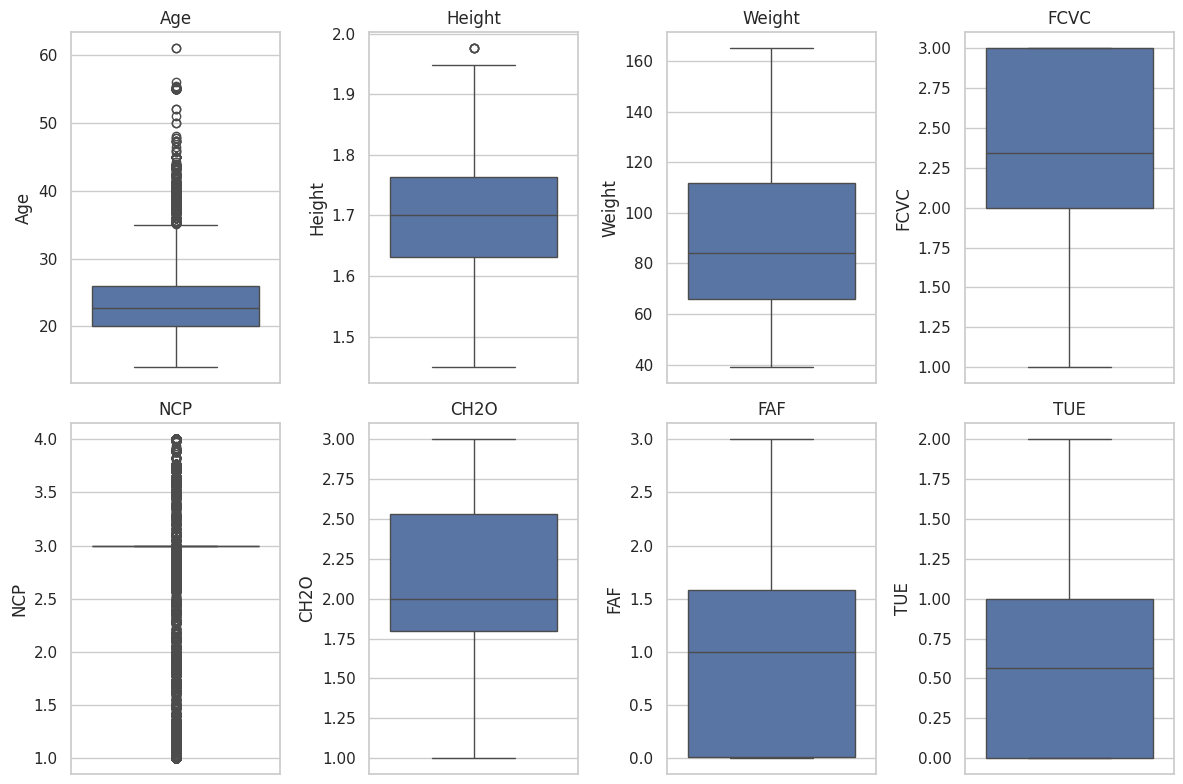

In [43]:
plt.figure(figsize=(12,8))
for i,col in enumerate(numeric_cols,1):
  plt.subplot(2,4,i)
  sns.boxplot(trainData[col])
  plt.title(col)
plt.tight_layout()
plt.show()

In [44]:
# IQR method to flag outliers
def outlier_indices(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    return series[(series < lower) | (series > upper)].index

outlier_dict = {col: outlier_indices(trainData[col]) for col in numeric_cols}

# check which columns have too many outliers
for col, idx in outlier_dict.items():
    print(f"{col}: {len(idx)} outliers")


Age: 792 outliers
Height: 4 outliers
Weight: 0 outliers
FCVC: 0 outliers
NCP: 4548 outliers
CH2O: 0 outliers
FAF: 0 outliers
TUE: 0 outliers


In [45]:
# Age had 792 outliers but its Maximum value was 61 and Minimum value was 14
# which can't be ignored.


# Compute IQR for Height
Q1 = trainData['Height'].quantile(0.25)
Q3 = trainData['Height'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

# Show the outlier values
trainData['Height'][(trainData['Height'] < lower) | (trainData['Height'] > upper)]

#Conculsion - The outlier heights are under 2m. Hence these can't be called
# bad outliers.

,Height
1271,1.975663
4084,1.975663
7272,1.975663
11718,1.975663


# **Data Preprocessing**

In [46]:
trainData.isnull().any()

,0
id,False
Gender,False
Age,False
Height,False
Weight,False
family_history_with_overweight,False
FAVC,False
FCVC,False
NCP,False
CAEC,False


In [47]:
trainData.duplicated().any()

np.False_

In [48]:
x=trainData.drop('WeightCategory',axis=1)
target=trainData["WeightCategory"]
target.head()

,WeightCategory
0,Overweight_Level_II
1,Normal_Weight
2,Insufficient_Weight
3,Obesity_Type_III
4,Overweight_Level_II


In [49]:
x.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation


In [50]:
numeric_cols = x.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = x.select_dtypes(include=['object', 'category']).columns.tolist()
from sklearn.preprocessing import OneHotEncoder
X_encoded = pd.get_dummies(x, drop_first=True)  # simple one-hot encoding

**LOADING DATASET FOR TRAINING AND TESTING MODELS**

In [51]:
trainData = pd.read_csv("train.csv")
testData = pd.read_csv("test.csv")

X = trainData.drop(columns=['WeightCategory', 'id'])
y = trainData['WeightCategory']

X_test = testData.drop(columns=['id'])

**1. DECISION TREE**

In [52]:
cat_cols = ['Gender','family_history_with_overweight','FAVC','CAEC','SMOKE','SCC','CALC','MTRANS']
le = LabelEncoder()
for col in cat_cols:
    x[col] = le.fit_transform(x[col])
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

--- Decision Tree Model Evaluation ---
Test Accuracy: 0.8651432249758609
Test Precision (Weighted): 0.8659294193764477
Test Recall (Weighted): 0.8651432249758609
Test F1-Score (Weighted): 0.8654772440534064

Confusion Matrix:
 [[307  36   1   1   0   0   1]
 [ 29 413   1   0   0  50   3]
 [  0   0 393  15   1  10  29]
 [  0   0  26 436   0   0   2]
 [  0   0   3   1 602   0   0]
 [  3  49   8   0   0 268  56]
 [  0   6  27   1   0  60 269]]

Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.91      0.89      0.90       346
      Normal_Weight       0.82      0.83      0.83       496
     Obesity_Type_I       0.86      0.88      0.87       448
    Obesity_Type_II       0.96      0.94      0.95       464
   Obesity_Type_III       1.00      0.99      1.00       606
 Overweight_Level_I       0.69      0.70      0.69       384
Overweight_Level_II       0.75      0.74      0.74       363

           accuracy                     

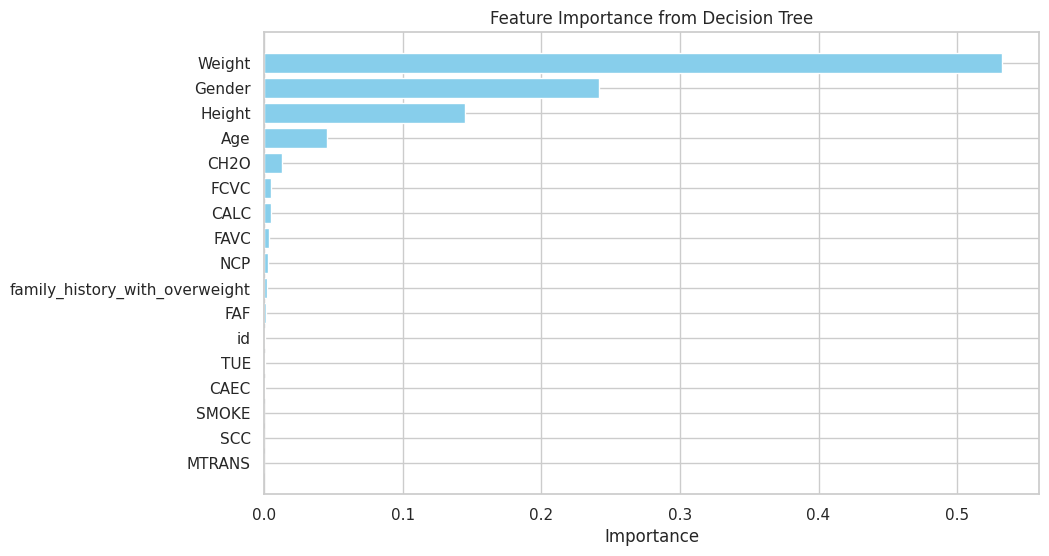

In [53]:
dt_clf = DecisionTreeClassifier(random_state=42)

dt_clf.fit(X_train, y_train)

y_pred = dt_clf.predict(X_test)

dt_clf = DecisionTreeClassifier(
    criterion='gini',
    max_depth=7,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

dt_clf.fit(X_train, y_train)

y_pred = dt_clf.predict(X_test)

test_accuracy_dtt = accuracy_score(y_test, y_pred)
test_precision_dtt = precision_score(y_test, y_pred, average='weighted', zero_division=0)
test_recall_dtt = recall_score(y_test, y_pred, average='weighted', zero_division=0)
test_f1_dtt = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print("--- Decision Tree Model Evaluation ---")
print("Test Accuracy:", test_accuracy_dtt)
print("Test Precision (Weighted):", test_precision_dtt)
print("Test Recall (Weighted):", test_recall_dtt)
print("Test F1-Score (Weighted):", test_f1_dtt)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


importances = dt_clf.feature_importances_

feature_names = X_train.columns

feat_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10,6))
plt.barh(feat_importances['Feature'], feat_importances['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.title("Feature Importance from Decision Tree")
plt.show()

**ACCURACY WITH DECISION TREE IS 0.8651432249758609**

**Hyperparameter Tuning Using Optuna on Decision Tree**

In [54]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.4/247.4 kB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 100.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 607.6/607.6 kB 47.9 MB/s eta 0:00:00


In [55]:
import optuna

[I 2025-10-26 16:26:14,114] A new study created in memory with name: no-name-e4d43aab-97e3-42da-bdb1-b5154228b207


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2025-10-26 16:26:14,530] Trial 0 finished with value: 0.8670532608361352 and parameters: {'criterion': 'log_loss', 'max_depth': 16, 'min_samples_split': 13, 'min_samples_leaf': 9}. Best is trial 0 with value: 0.8670532608361352.
[I 2025-10-26 16:26:14,901] Trial 1 finished with value: 0.8665707195708443 and parameters: {'criterion': 'gini', 'max_depth': 15, 'min_samples_split': 20, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.8670532608361352.
[I 2025-10-26 16:26:15,320] Trial 2 finished with value: 0.8619832915433066 and parameters: {'criterion': 'entropy', 'max_depth': 16, 'min_samples_split': 15, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.8670532608361352.
[I 2025-10-26 16:26:15,710] Trial 3 finished with value: 0.8604543754886519 and parameters: {'criterion': 'gini', 'max_depth': 17, 'min_samples_split': 10, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.8670532608361352.
[I 2025-10-26 16:26:16,035] Trial 4 finished with value: 0.8658457907541791 and p

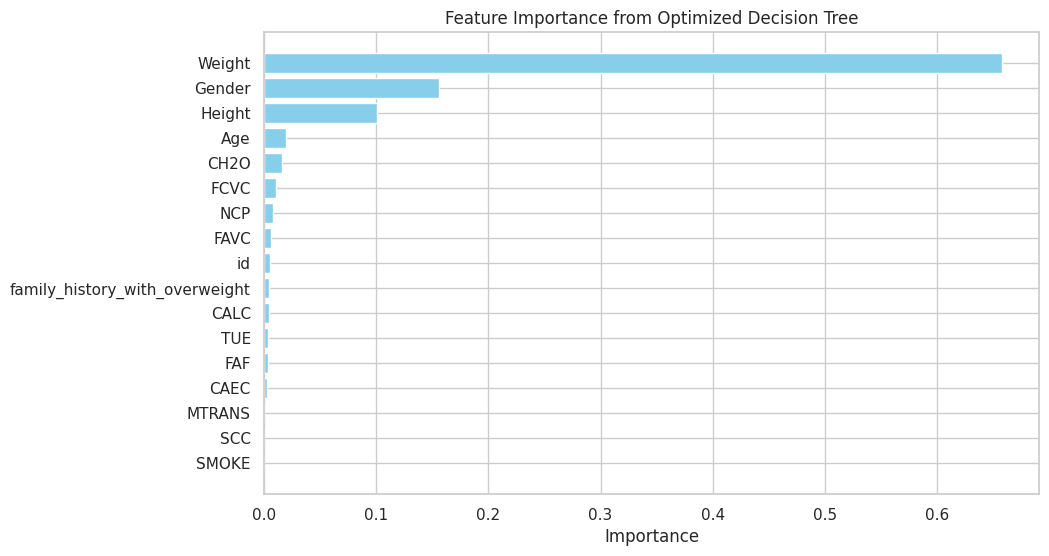

In [56]:
def objective(trial):
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy', 'log_loss'])
    max_depth = trial.suggest_int('max_depth', 2, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    dt_clf = DecisionTreeClassifier(
        criterion=criterion,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    score = cross_val_score(dt_clf, X_train, y_train, cv=5, scoring='accuracy').mean()
    return score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50, show_progress_bar=True)

best_params = study.best_params
dt_clf_best = DecisionTreeClassifier(**best_params, random_state=42)
dt_clf_best.fit(X_train, y_train)
y_pred = dt_clf_best.predict(X_test)

test_accuracy_dtt_hp = accuracy_score(y_test, y_pred)
test_precision_dtt_hp = precision_score(y_test, y_pred, average='weighted', zero_division=0)
test_recall_dtt_hp = recall_score(y_test, y_pred, average='weighted', zero_division=0)
test_f1_dtt_hp = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print("Best parameters:", study.best_params)
print("Best cross-validation accuracy:", study.best_value)
print("--- Decision Tree Model Evaluation (Optimized) ---")
print("Test Accuracy:", test_accuracy_dtt_hp)
print("Test Precision (Weighted):", test_precision_dtt_hp)
print("Test Recall (Weighted):", test_recall_dtt_hp)
print("Test F1-Score (Weighted):", test_f1_dtt_hp)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

importances = dt_clf_best.feature_importances_
feature_names = X_train.columns
feat_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
plt.barh(feat_importances['Feature'], feat_importances['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.title("Feature Importance from Optimized Decision Tree")
plt.show()


**ACCURACY WITH DECISION TREE USING OPTUNA IS 0.8651432249758609**

**2. RANDOM FOREST**

--- Random Forest Model Evaluation ---
Test Accuracy: 0.8918570968780174
Test Precision (Weighted): 0.8934727995317859
Test Recall (Weighted): 0.8918570968780174
Test F1-Score (Weighted): 0.891523274112166

Confusion Matrix:
 [[308  35   0   1   0   1   1]
 [ 19 441   1   0   0  28   7]
 [  0   1 395  13   1  10  28]
 [  0   0  12 449   0   0   3]
 [  0   0   1   1 603   1   0]
 [  2  51   8   0   0 267  56]
 [  0  12  20   1   0  22 308]]

Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.94      0.89      0.91       346
      Normal_Weight       0.82      0.89      0.85       496
     Obesity_Type_I       0.90      0.88      0.89       448
    Obesity_Type_II       0.97      0.97      0.97       464
   Obesity_Type_III       1.00      1.00      1.00       606
 Overweight_Level_I       0.81      0.70      0.75       384
Overweight_Level_II       0.76      0.85      0.80       363

           accuracy                      

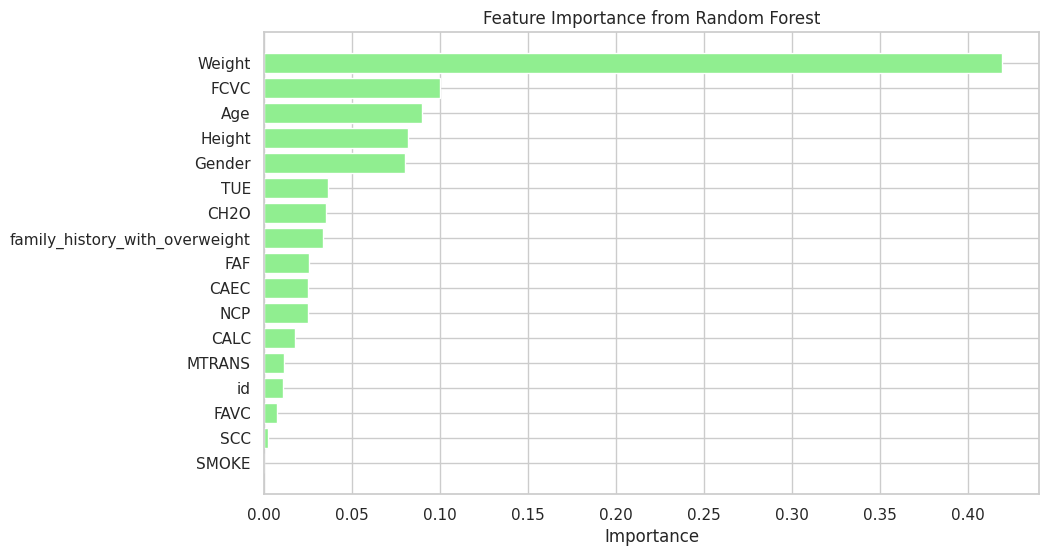

In [57]:

rf_clf = RandomForestClassifier(
    n_estimators=200,
    criterion='gini',
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)

rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)

test_accuracy_rf = accuracy_score(y_test, y_pred)
test_precision_rf = precision_score(y_test, y_pred, average='weighted', zero_division=0)
test_recall_rf = recall_score(y_test, y_pred, average='weighted', zero_division=0)
test_f1_rf = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print("--- Random Forest Model Evaluation ---")
print("Test Accuracy:", test_accuracy_rf)
print("Test Precision (Weighted):", test_precision_rf)
print("Test Recall (Weighted):", test_recall_rf)
print("Test F1-Score (Weighted):", test_f1_rf)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

importances = rf_clf.feature_importances_
feature_names = X_train.columns
feat_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10,6))
plt.barh(feat_importances['Feature'], feat_importances['Importance'], color='lightgreen')
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.title("Feature Importance from Random Forest")
plt.show()

**THE ACCURACY FROM RANDOM FOREST IS 0.8918570968780174**

**Hyperparameter Tuning Using Optuna On Random Forest**

[I 2025-10-26 16:26:33,349] A new study created in memory with name: no-name-09421bbf-a836-42aa-aab8-94d59390f898


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2025-10-26 16:26:46,860] Trial 0 finished with value: 0.8913566677620024 and parameters: {'n_estimators': 185, 'max_depth': 17, 'min_samples_split': 16, 'min_samples_leaf': 4, 'max_features': None, 'criterion': 'log_loss'}. Best is trial 0 with value: 0.8913566677620024.
[I 2025-10-26 16:26:54,075] Trial 1 finished with value: 0.8937714136791788 and parameters: {'n_estimators': 283, 'max_depth': 12, 'min_samples_split': 15, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'criterion': 'entropy'}. Best is trial 1 with value: 0.8937714136791788.
[I 2025-10-26 16:27:06,595] Trial 2 finished with value: 0.891195637218322 and parameters: {'n_estimators': 196, 'max_depth': 19, 'min_samples_split': 17, 'min_samples_leaf': 4, 'max_features': None, 'criterion': 'entropy'}. Best is trial 1 with value: 0.8937714136791788.
[I 2025-10-26 16:27:12,097] Trial 3 finished with value: 0.8944956626322698 and parameters: {'n_estimators': 255, 'max_depth': 14, 'min_samples_split': 7, 'min_samples_leaf': 3

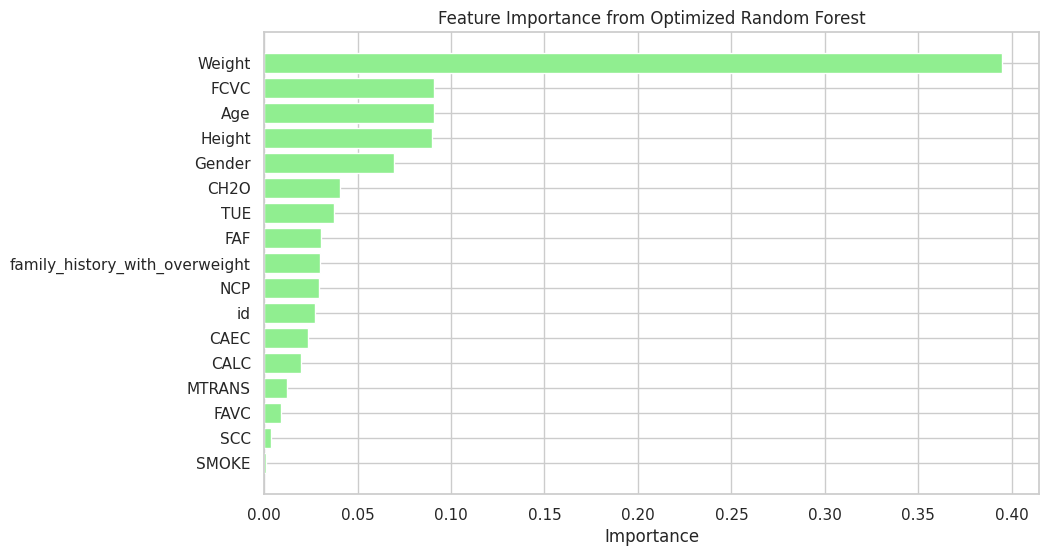

In [58]:
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 100, 500)
    max_depth = trial.suggest_int('max_depth', 2, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy', 'log_loss'])

    rf_clf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        criterion=criterion,
        random_state=42,
        n_jobs=-1
    )

    score = cross_val_score(rf_clf, X_train, y_train, cv=5, scoring='accuracy').mean()
    return score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50, show_progress_bar=True)

best_params = study.best_params
rf_clf_best = RandomForestClassifier(**best_params, random_state=42, n_jobs=-1)
rf_clf_best.fit(X_train, y_train)
y_pred = rf_clf_best.predict(X_test)

test_accuracy_rf_hp = accuracy_score(y_test, y_pred)
test_precision_rf_hp = precision_score(y_test, y_pred, average='weighted', zero_division=0)
test_recall_rf_hp = recall_score(y_test, y_pred, average='weighted', zero_division=0)
test_f1_rf_hp = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print("Best parameters:", study.best_params)
print("Best cross-validation accuracy:", study.best_value)
print("--- Random Forest Model Evaluation (Optimized) ---")
print("Test Accuracy:", test_accuracy_rf_hp)
print("Test Precision (Weighted):", test_precision_rf_hp)
print("Test Recall (Weighted):", test_recall_rf_hp)
print("Test F1-Score (Weighted):", test_f1_rf_hp)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

importances = rf_clf_best.feature_importances_
feature_names = X_train.columns
feat_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
plt.barh(feat_importances['Feature'], feat_importances['Importance'], color='lightgreen')
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.title("Feature Importance from Optimized Random Forest")
plt.show()


**THE ACCURACY FROM RANDOM FOREST USING OPTUNA IS 0.8999034438364982**

**3. GRADIENT BOOSTING**

--- Gradient Boosting Model Evaluation ---
Test Accuracy: 0.8979723205664628
Test Precision (Weighted): 0.8982407446122279
Test Recall (Weighted): 0.8979723205664628
Test F1-Score (Weighted): 0.8980677084050355

Confusion Matrix:
 [[312  31   1   1   0   0   1]
 [ 25 432   2   0   0  34   3]
 [  1   0 397  11   1  12  26]
 [  0   0  16 448   0   0   0]
 [  0   0   2   1 603   0   0]
 [  2  34   6   0   0 299  43]
 [  0   7  21   3   0  33 299]]

Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.92      0.90      0.91       346
      Normal_Weight       0.86      0.87      0.86       496
     Obesity_Type_I       0.89      0.89      0.89       448
    Obesity_Type_II       0.97      0.97      0.97       464
   Obesity_Type_III       1.00      1.00      1.00       606
 Overweight_Level_I       0.79      0.78      0.78       384
Overweight_Level_II       0.80      0.82      0.81       363

           accuracy                 

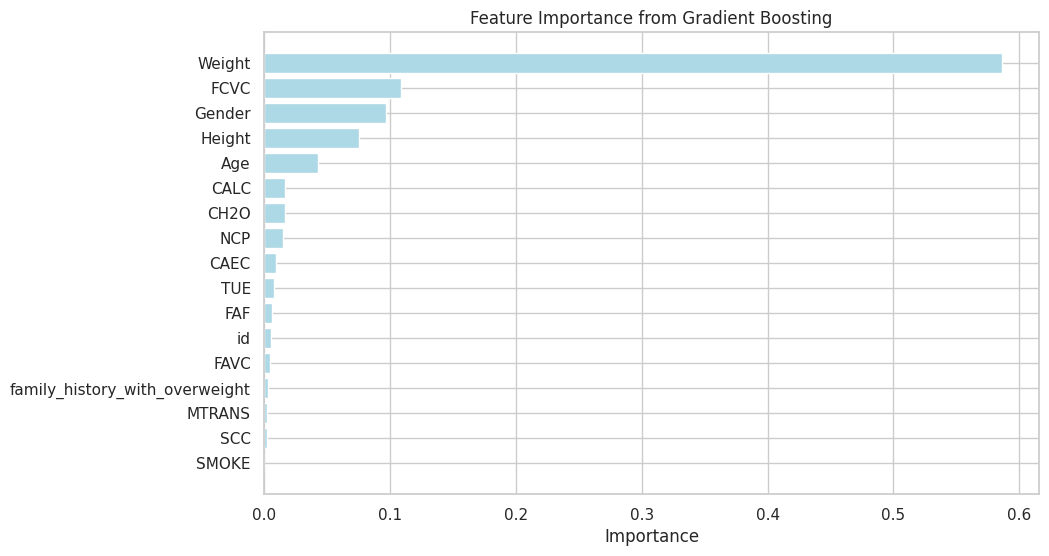

In [59]:
gb_clf = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    min_samples_split=5,
    min_samples_leaf=2,
    subsample=0.8,
    random_state=42
)

gb_clf.fit(X_train, y_train)

y_pred = gb_clf.predict(X_test)

test_accuracy_gb = accuracy_score(y_test, y_pred)
test_precision_gb = precision_score(y_test, y_pred, average='weighted', zero_division=0)
test_recall_gb = recall_score(y_test, y_pred, average='weighted', zero_division=0)
test_f1_gb = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print("--- Gradient Boosting Model Evaluation ---")
print("Test Accuracy:", test_accuracy_gb)
print("Test Precision (Weighted):", test_precision_gb)
print("Test Recall (Weighted):", test_recall_gb)
print("Test F1-Score (Weighted):", test_f1_gb)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

importances = gb_clf.feature_importances_
feature_names = X_train.columns
feat_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
plt.barh(feat_importances['Feature'], feat_importances['Importance'], color='lightblue')
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.title("Feature Importance from Gradient Boosting")
plt.show()

**THE ACCURACY USING GRADIENT BOOSTING IS 0.8979723205664628**

In [60]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.9/115.9 MB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.8/296.8 MB 1.3 MB/s eta 0:00:00


**4. XGBOOST**

In [61]:
from xgboost import XGBClassifier

--- XGBoost Model Evaluation ---
Test Accuracy: 0.9034438364982298
Test Precision (Weighted): 0.9039893335772461
Test Recall (Weighted): 0.9034438364982298
Test F1-Score (Weighted): 0.9036474236074407

Confusion Matrix:
 [[313  30   1   1   0   0   1]
 [ 19 435   2   0   0  35   5]
 [  0   0 403  10   1  12  22]
 [  0   0  11 452   0   0   1]
 [  0   0   1   1 603   0   1]
 [  2  33   4   0   0 301  44]
 [  0   7  22   1   0  33 300]]

Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.94      0.90      0.92       346
      Normal_Weight       0.86      0.88      0.87       496
     Obesity_Type_I       0.91      0.90      0.90       448
    Obesity_Type_II       0.97      0.97      0.97       464
   Obesity_Type_III       1.00      1.00      1.00       606
 Overweight_Level_I       0.79      0.78      0.79       384
Overweight_Level_II       0.80      0.83      0.81       363

           accuracy                           

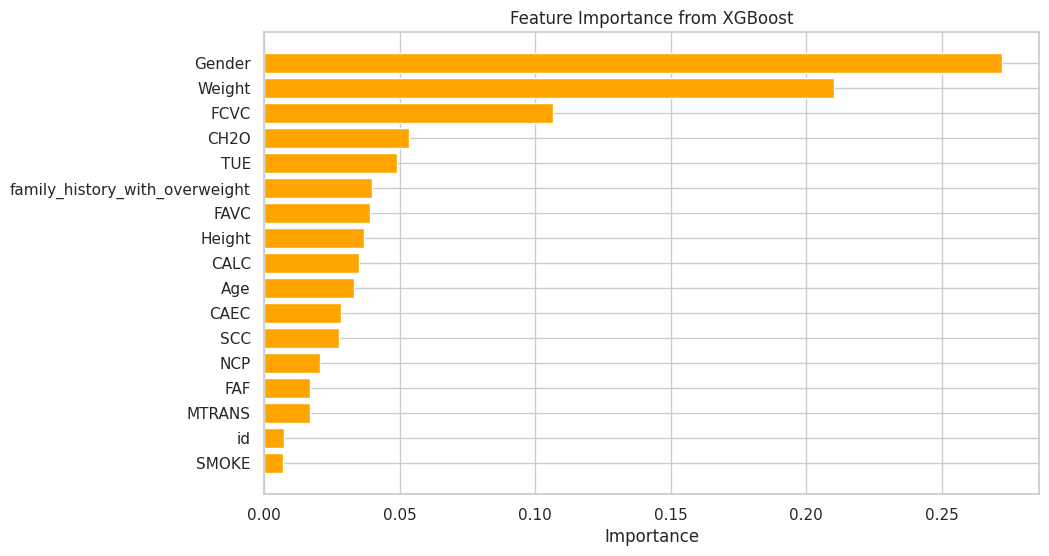

In [62]:
y_enc = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    x, y_enc, test_size=0.2, random_state=42
)

xgb_clf = XGBClassifier(
    n_estimators=200,
    max_depth=4,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0,
    reg_alpha=0,
    reg_lambda=1,
    random_state=42,
    eval_metric='mlogloss'
)

xgb_clf.fit(X_train, y_train)

y_pred_enc = xgb_clf.predict(X_test)

y_pred = le.inverse_transform(y_pred_enc)
y_test_orig = le.inverse_transform(y_test)

test_accuracy_xgb = accuracy_score(y_test_orig, y_pred)
test_precision_xgb = precision_score(y_test_orig, y_pred, average='weighted', zero_division=0)
test_recall_xgb = recall_score(y_test_orig, y_pred, average='weighted', zero_division=0)
test_f1_xgb = f1_score(y_test_orig, y_pred, average='weighted', zero_division=0)

print("--- XGBoost Model Evaluation ---")
print("Test Accuracy:", test_accuracy_xgb)
print("Test Precision (Weighted):", test_precision_xgb)
print("Test Recall (Weighted):", test_recall_xgb)
print("Test F1-Score (Weighted):", test_f1_xgb)
print("\nConfusion Matrix:\n", confusion_matrix(y_test_orig, y_pred))
print("\nClassification Report:\n", classification_report(y_test_orig, y_pred))

importances = xgb_clf.feature_importances_
feature_names = X_train.columns
feat_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10,6))
plt.barh(feat_importances['Feature'], feat_importances['Importance'], color='orange')
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.title("Feature Importance from XGBoost")
plt.show()

**THE ACCURACY USING XGBOOST IS 0.9034438364982298**

**Hyperparameter Tuning Using Optuna On XGBoost**

[I 2025-10-26 16:34:58,955] A new study created in memory with name: no-name-5aa55680-6bdc-475b-98b7-52225fdc09eb


✅ Training samples: 12426 | Features: 16


  0%|          | 0/60 [00:00<?, ?it/s]

[I 2025-10-26 16:35:18,549] Trial 0 finished with value: 0.9074229060709458 and parameters: {'n_estimators': 767, 'learning_rate': 0.011630836979826885, 'max_depth': 10, 'min_child_weight': 6, 'subsample': 0.7802913074065987, 'colsample_bytree': 0.5581257000430231, 'gamma': 0.15183002639795884, 'reg_alpha': 0.13868042954928156, 'reg_lambda': 1.6163301843232656}. Best is trial 0 with value: 0.9074229060709458.
[I 2025-10-26 16:35:35,052] Trial 1 finished with value: 0.9074229060709457 and parameters: {'n_estimators': 795, 'learning_rate': 0.013231395935522297, 'max_depth': 9, 'min_child_weight': 6, 'subsample': 0.7121614722908453, 'colsample_bytree': 0.5755879996239438, 'gamma': 0.1502205983473868, 'reg_alpha': 0.0850250059080261, 'reg_lambda': 1.613935063799916}. Best is trial 0 with value: 0.9074229060709458.
[I 2025-10-26 16:35:52,593] Trial 2 finished with value: 0.9080666967102299 and parameters: {'n_estimators': 768, 'learning_rate': 0.01477392524322971, 'max_depth': 10, 'min_chil

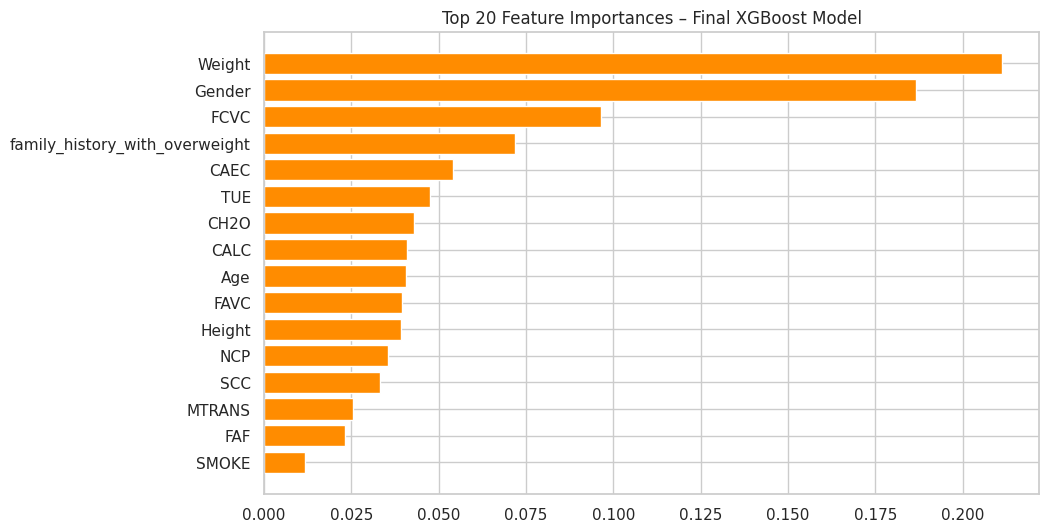

In [63]:
# ===========================================================
# ⚡ Optuna Optimization + Final XGBoost + Kaggle Submission
# ===========================================================

import optuna
from optuna.samplers import TPESampler
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# 1️⃣ Load Data
# -----------------------------
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Separate features and target
X = train_df.drop('WeightCategory', axis=1)
y = train_df['WeightCategory']

# Drop ID if present
if 'id' in X.columns:
    X = X.drop('id', axis=1)

test_ids = test_df['id'] if 'id' in test_df.columns else None
test_features = test_df.drop('id', axis=1, errors='ignore')

# -----------------------------
# 2️⃣ Encode categorical variables
# -----------------------------
le_target = LabelEncoder()
y_enc = le_target.fit_transform(y)

# Label encode categorical columns for both train and test
X_encoded = X.copy()
test_encoded = test_features.copy()

for col in X_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])
    test_encoded[col] = le.transform(test_encoded[col])  # same encoder on test

# Split data for evaluation
X_train, X_valid, y_train, y_valid = train_test_split(
    X_encoded, y_enc, test_size=0.2, random_state=42, stratify=y_enc
)

print(f"✅ Training samples: {X_train.shape[0]} | Features: {X_train.shape[1]}")

# -----------------------------
# 3️⃣ Your three best parameter sets
# -----------------------------
base_params_list = [
   {'n_estimators': 802, 'learning_rate': 0.01376727840442897, 'max_depth': 10, 'min_child_weight': 4, 'subsample': 0.7294665487567288, 'colsample_bytree': 0.5546856654158943, 'gamma': 0.16215372378274814, 'reg_alpha': 0.1275266644210375, 'reg_lambda': 1.6207767848777366},

   {'n_estimators': 771, 'learning_rate': 0.013703494452479268, 'max_depth': 10, 'min_child_weight': 4, 'subsample': 0.7002200873954504, 'colsample_bytree': 0.5528037754800043, 'gamma': 0.1951947752165459, 'reg_alpha': 0.1397555185137831, 'reg_lambda': 1.6147146257448057},

    {'n_estimators': 809, 'learning_rate': 0.013314881450029495, 'max_depth': 9, 'min_child_weight': 3, 'subsample': 0.7675430727257503, 'colsample_bytree': 0.5599981247033479, 'gamma': 0.1416646576710503, 'reg_alpha': 0.12140295992038691, 'reg_lambda': 1.5505437116668446}
]


# Compute mean center point
mean_params = {k: np.mean([p[k] for p in base_params_list]) for k in base_params_list[0]}

# -----------------------------
# 4️⃣ Optuna objective function
# -----------------------------
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 680, 820),
        'learning_rate': trial.suggest_float('learning_rate', 0.010, 0.016, log=True),
        'max_depth': trial.suggest_int('max_depth', 8, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 3, 6),
        'subsample': trial.suggest_float('subsample', 0.70, 0.80),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.55, 0.60),
        'gamma': trial.suggest_float('gamma', 0.13, 0.20),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.07, 0.14),
        'reg_lambda': trial.suggest_float('reg_lambda', 1.5, 1.7),
        'eval_metric': 'mlogloss',
        'tree_method': 'hist',
        'random_state': 42,
        'n_jobs': -1
    }

    model = XGBClassifier(**params)
    cv = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)
    scores = cross_val_score(model, X_encoded, y_enc, cv=cv, scoring='accuracy', n_jobs=-1)
    return scores.mean()


# -----------------------------
# 5️⃣ Run Optuna (fewer than 100 trials)
# -----------------------------
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=60, show_progress_bar=True)
print("Best params:", study.best_params)
print("Best accuracy:", study.best_value)

# -----------------------------
# 6️⃣ Train final model
# -----------------------------
best_params = study.best_trial.params
final_model = XGBClassifier(**best_params)
final_model.fit(X_encoded, y_enc)

# -----------------------------
# ✅ 6.1 Evaluate Final Model
# -----------------------------
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Predict on validation set
y_pred_valid = final_model.predict(X_valid)

# Compute metrics
test_accuracy_xgb_hp = accuracy_score(y_valid, y_pred_valid)
test_precision_xgb_hp = precision_score(y_valid, y_pred_valid, average='weighted')
test_recall_xgb_hp = recall_score(y_valid, y_pred_valid, average='weighted')
test_f1_xgb_hp = f1_score(y_valid, y_pred_valid, average='weighted')
cm = confusion_matrix(y_valid, y_pred_valid)

# Display results
print("\n🔍 Model Evaluation on Validation Set")
print("=====================================")
print("Accuracy:",test_accuracy_xgb_hp)
print("Precision:",test_precision_xgb_hp)
print("Recall:",test_recall_xgb_hp)
print("F1 Score:",test_f1_xgb_hp)
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_valid, y_pred_valid))

# -----------------------------
# 7️⃣ Make Predictions on Test Data
# -----------------------------
test_preds_enc = final_model.predict(test_encoded)
test_preds = le_target.inverse_transform(test_preds_enc)

# -----------------------------
# 8️⃣ Prepare Submission File
# -----------------------------
submission = pd.DataFrame({
    "id": test_ids,
    "WeightCategory": test_preds
})

submission.to_csv("submission.csv", index=False)
print("\n📁 Submission file saved as 'submission.csv'")

# -----------------------------
# 9️⃣ Optional: Feature Importance Plot
# -----------------------------
feat_imp = pd.DataFrame({
    "Feature": X_encoded.columns,
    "Importance": final_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10,6))
plt.barh(feat_imp["Feature"][:20], feat_imp["Importance"][:20], color="darkorange")
plt.gca().invert_yaxis()
plt.title("Top 20 Feature Importances – Final XGBoost Model")
plt.show()

XGBOOST ACCURACY USING OPTUNA IS **0.964274219504345**

---



**5. ADABOOST**

In [71]:
base_estimator = DecisionTreeClassifier(
    criterion='gini',
    max_depth=7,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

ada_clf = AdaBoostClassifier(
    estimator=base_estimator,
    n_estimators=100,
    learning_rate=0.5,
    random_state=42
)

ada_clf.fit(X_train, y_train)
y_pred_enc = ada_clf.predict(X_test)

y_pred = le.inverse_transform(y_pred_enc)
y_test_orig = le.inverse_transform(y_test)

test_accuracy_ab = accuracy_score(y_test_orig, y_pred)
test_precision_ab = precision_score(y_test_orig, y_pred, average='weighted', zero_division=0)
test_recall_ab = recall_score(y_test_orig, y_pred, average='weighted', zero_division=0)
test_f1_ab = f1_score(y_test_orig, y_pred, average='weighted', zero_division=0)

print("--- AdaBoost Model Evaluation ---")
print("Test Accuracy (AdaBoost):", test_accuracy_ab)
print("Test Precision (Weighted):", test_precision_ab)
print("Test Recall (Weighted):", test_recall_ab)
print("Test F1-Score (Weighted):", test_f1_ab)
print("\nConfusion Matrix:\n", confusion_matrix(y_test_orig, y_pred))
print("\nClassification Report:\n", classification_report(y_test_orig, y_pred))

--- AdaBoost Model Evaluation ---
Test Accuracy (AdaBoost): 0.8847763115545543
Test Precision (Weighted): 0.8860478578886273
Test Recall (Weighted): 0.8847763115545543
Test F1-Score (Weighted): 0.8852893045389144

Confusion Matrix:
 [[306  37   1   1   0   0   1]
 [ 26 417   1   0   0  43   9]
 [  0   0 389  13   1  14  31]
 [  0   0  16 447   0   0   1]
 [  0   0   2   1 603   0   0]
 [  2  34   4   0   0 296  48]
 [  0   4  24   3   0  41 291]]

Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.92      0.88      0.90       346
      Normal_Weight       0.85      0.84      0.84       496
     Obesity_Type_I       0.89      0.87      0.88       448
    Obesity_Type_II       0.96      0.96      0.96       464
   Obesity_Type_III       1.00      1.00      1.00       606
 Overweight_Level_I       0.75      0.77      0.76       384
Overweight_Level_II       0.76      0.80      0.78       363

           accuracy               

**THE ACCURACY USING ADABOOST ON DECISION TREE IS 0.8847763115545543**

**Hyperparameter Tuning Using Optuna On AdaBOOST**



In [ ]:
def objective(trial):
    max_depth = trial.suggest_int('max_depth', 1, 10)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    n_estimators = trial.suggest_int('n_estimators', 50, 500)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 1.0)

    base_estimator = DecisionTreeClassifier(
        criterion='gini',
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )

    ada_clf = AdaBoostClassifier(
        estimator=base_estimator,
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        random_state=42
    )

    score = cross_val_score(ada_clf, X_train, y_train, cv=5, scoring='accuracy').mean()
    return score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50, show_progress_bar=True)

best_params = study.best_params
base_estimator = DecisionTreeClassifier(
    criterion='gini',
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    random_state=42
)

ada_clf_best = AdaBoostClassifier(
    estimator=base_estimator,
    n_estimators=best_params['n_estimators'],
    learning_rate=best_params['learning_rate'],
    random_state=42
)
ada_clf_best.fit(X_train, y_train)
y_pred_enc = ada_clf_best.predict(X_test)

y_pred = le.inverse_transform(y_pred_enc)
y_test_orig = le.inverse_transform(y_test)

test_accuracy_ab_hp = accuracy_score(y_test_orig, y_pred)
test_precision_ab_hp = precision_score(y_test_orig, y_pred, average='weighted', zero_division=0)
test_recall_ab_hp = recall_score(y_test_orig, y_pred, average='weighted', zero_division=0)
test_f1_ab_hp = f1_score(y_test_orig, y_pred, average='weighted', zero_division=0)

print("Best parameters:", study.best_params)
print("Best cross-validation accuracy:", study.best_value)
print("--- AdaBoost Model Evaluation (Optimized) ---")
print("Test Accuracy (AdaBoost):", test_accuracy_ab_hp)
print("Test Precision (Weighted):", test_precision_ab_hp)
print("Test Recall (Weighted):", test_recall_ab_hp)
print("Test F1-Score (Weighted):", test_f1_ab_hp)
print("\nConfusion Matrix:\n", confusion_matrix(y_test_orig, y_pred))
print("\nClassification Report:\n", classification_report(y_test_orig, y_pred))


**THE ACCURACY USING ADABOOST ON DECISION TREE USING OPTUNA IS 0.8937882201480528**

**6. KNN**

In [68]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Now split encoded labels
X_train, X_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)
knn_clf = KNeighborsClassifier(n_neighbors=5)

# Fit model
knn_clf.fit(X_train, y_train)

# Predict
y_pred_enc = knn_clf.predict(X_test)

# Decode predictions back to original labels
y_pred = le.inverse_transform(y_pred_enc)
y_test_orig = le.inverse_transform(y_test)

# --- Individual Classification Metrics Calculation ---
test_accuracy_knn = accuracy_score(y_test_orig, y_pred)
test_precision_knn = precision_score(y_test_orig, y_pred, average='weighted', zero_division=0)
test_recall_knn = recall_score(y_test_orig, y_pred, average='weighted', zero_division=0)
test_f1_knn = f1_score(y_test_orig, y_pred, average='weighted', zero_division=0)

# Evaluate
print("--- KNN Model Evaluation ---")
print("Test Accuracy (KNN):", test_accuracy_knn)
print("Test Precision (Weighted):", test_precision_knn)
print("Test Recall (Weighted):", test_recall_knn)
print("Test F1-Score (Weighted):", test_f1_knn)
print("\nConfusion Matrix:\n", confusion_matrix(y_test_orig, y_pred))
print("\nClassification Report:\n", classification_report(y_test_orig, y_pred))

--- KNN Model Evaluation ---
Test Accuracy (KNN): 0.4354682973929836
Test Precision (Weighted): 0.4292489701413928
Test Recall (Weighted): 0.4354682973929836
Test F1-Score (Weighted): 0.43105678373536

Confusion Matrix:
 [[215 122   1   0   1   6   1]
 [148 235  11   0   0  75  27]
 [  0  12 156  38  95  68  79]
 [  0   0  34 246 181   2   1]
 [  0   0  59 240 306   0   1]
 [ 12 133  56   0   1 106  76]
 [  3  33 125   8   7  98  89]]

Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.57      0.62      0.59       346
      Normal_Weight       0.44      0.47      0.46       496
     Obesity_Type_I       0.35      0.35      0.35       448
    Obesity_Type_II       0.46      0.53      0.49       464
   Obesity_Type_III       0.52      0.50      0.51       606
 Overweight_Level_I       0.30      0.28      0.29       384
Overweight_Level_II       0.32      0.25      0.28       363

           accuracy                           

**THE ACCURACY USING KNN IS
0.4354682973929836**

**Hyperparameter Tuning Using Optuna On KNN**



In [69]:
import optuna
from sklearn.model_selection import cross_val_score

def objective(trial):
    n_neighbors = trial.suggest_int('n_neighbors', 1, 30)
    weights = trial.suggest_categorical('weights', ['uniform', 'distance'])
    metric = trial.suggest_categorical('metric', ['euclidean', 'manhattan', 'minkowski'])
    model = KNeighborsClassifier(
        n_neighbors=n_neighbors,
        weights=weights,
        metric=metric
    )
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()
    return score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50, n_jobs=-1)

best_params = study.best_params
print("Best Parameters:", best_params)

knn_clf = KNeighborsClassifier(**best_params)
knn_clf.fit(X_train, y_train)

y_pred_enc = knn_clf.predict(X_test)
y_pred = le.inverse_transform(y_pred_enc)
y_test_orig = le.inverse_transform(y_test)

test_accuracy_knn_hp = accuracy_score(y_test_orig, y_pred)
test_precision_knn_hp = precision_score(y_test_orig, y_pred, average='weighted', zero_division=0)
test_recall_knn_hp = recall_score(y_test_orig, y_pred, average='weighted', zero_division=0)
test_f1_knn_hp = f1_score(y_test_orig, y_pred, average='weighted', zero_division=0)

print("--- Tuned KNN Model Evaluation ---")
print("Test Accuracy (KNN):", test_accuracy_knn_hp)
print("Test Precision (Weighted):", test_precision_knn_hp)
print("Test Recall (Weighted):", test_recall_knn_hp)
print("Test F1-Score (Weighted):", test_f1_knn_hp)
print("\nConfusion Matrix:\n", confusion_matrix(y_test_orig, y_pred))
print("\nClassification Report:\n", classification_report(y_test_orig, y_pred))


[I 2025-10-26 16:57:35,221] A new study created in memory with name: no-name-668063b0-867a-43d7-855a-4ea887a4455c
[I 2025-10-26 16:57:43,854] Trial 4 finished with value: 0.37035040492350724 and parameters: {'n_neighbors': 18, 'weights': 'uniform', 'metric': 'minkowski'}. Best is trial 4 with value: 0.37035040492350724.
[I 2025-10-26 16:57:44,349] Trial 21 finished with value: 0.42282166045346903 and parameters: {'n_neighbors': 5, 'weights': 'uniform', 'metric': 'euclidean'}. Best is trial 21 with value: 0.42282166045346903.
[I 2025-10-26 16:57:44,755] Trial 8 finished with value: 0.3668904496973798 and parameters: {'n_neighbors': 19, 'weights': 'uniform', 'metric': 'euclidean'}. Best is trial 21 with value: 0.42282166045346903.
[I 2025-10-26 16:57:45,648] Trial 13 finished with value: 0.3668904496973798 and parameters: {'n_neighbors': 19, 'weights': 'uniform', 'metric': 'euclidean'}. Best is trial 21 with value: 0.42282166045346903.
[I 2025-10-26 16:57:45,855] Trial 15 finished with v

Best Parameters: {'n_neighbors': 2, 'weights': 'distance', 'metric': 'manhattan'}
--- Tuned KNN Model Evaluation ---
Test Accuracy (KNN): 0.5468297392983585
Test Precision (Weighted): 0.5414058059931212
Test Recall (Weighted): 0.5468297392983585
Test F1-Score (Weighted): 0.5415818219119306

Confusion Matrix:
 [[226 109   2   0   1   7   1]
 [112 234  13   1   0 104  32]
 [  0   7 166  42  75  54 104]
 [  0   0  31 291 138   0   4]
 [  0   0  16  71 519   0   0]
 [  2 108  38   0   0 132 104]
 [  2  24  96   9   7  94 131]]

Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.66      0.65      0.66       346
      Normal_Weight       0.49      0.47      0.48       496
     Obesity_Type_I       0.46      0.37      0.41       448
    Obesity_Type_II       0.70      0.63      0.66       464
   Obesity_Type_III       0.70      0.86      0.77       606
 Overweight_Level_I       0.34      0.34      0.34       384
Overweight_Level_I

**KNN ACCURACY USING OPTUNA IS**

# **CONCLUSION**

✅ Model Comparison DataFrame (results_df) Created:


,Model,Accuracy,Precision,Recall,F1-Score
0,Decision Tree,0.8651,0.8659,0.8651,0.8655
1,Random Forest,0.8919,0.8935,0.8919,0.8915
2,Gradient Boosting,0.8980,0.8982,0.8980,0.8981
3,KNN,0.4355,0.4292,0.4355,0.4311
4,AdaBoost,0.8848,0.8860,0.8848,0.8853
5,XGBoost,0.9034,0.9040,0.9034,0.9036



--- 📝 Descriptive Statistics of Model Performance Metrics ---


,Accuracy,Precision,Recall,F1-Score
count,6.0000,6.0000,6.0000,6.0000
mean,0.8131,0.8128,0.8131,0.8125
std,0.1855,0.1884,0.1855,0.1873
min,0.4355,0.4292,0.4355,0.4311
25%,0.8700,0.8709,0.8700,0.8704
50%,0.8884,0.8898,0.8884,0.8884
75%,0.8965,0.8970,0.8965,0.8964
max,0.9034,0.9040,0.9034,0.9036



--- 💡 Key Insights from Model Metrics ---
🥇 Best Overall Model (by F1-Score): **XGBoost** (F1-Score: 0.9036)
🎯 Highest Accuracy Observed: 0.9034


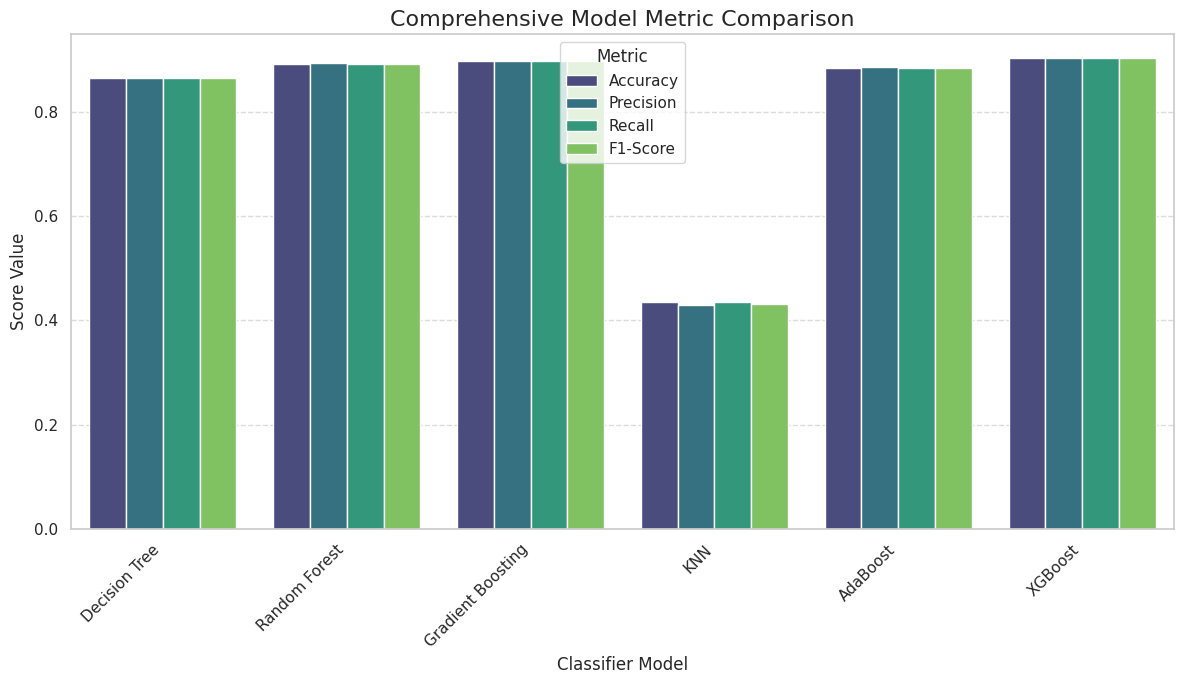

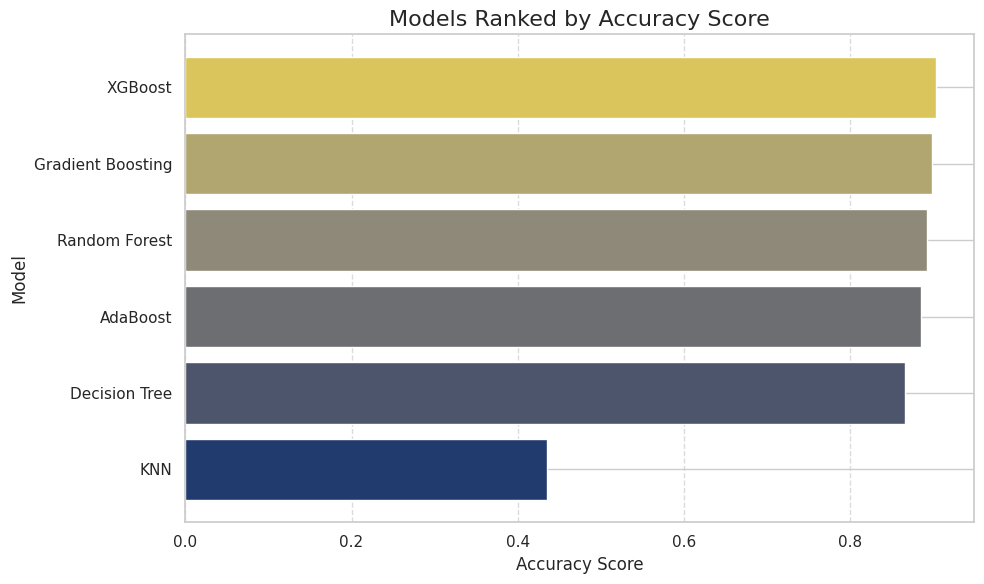

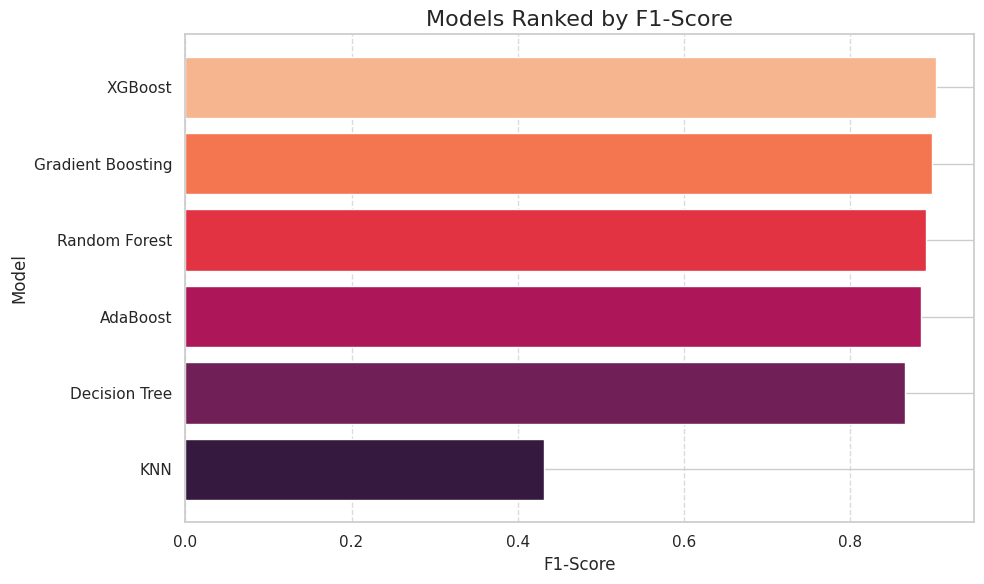

In [74]:
results = [
    {"Model": "Decision Tree",
     "Accuracy": test_accuracy_dtt,
     "Precision": test_precision_dtt,
     "Recall": test_recall_dtt,
     "F1-Score": test_f1_dtt},

    {"Model": "Random Forest",
     "Accuracy": test_accuracy_rf,
     "Precision": test_precision_rf,
     "Recall": test_recall_rf,
     "F1-Score": test_f1_rf},

    {"Model": "Gradient Boosting",
     "Accuracy": test_accuracy_gb,
     "Precision": test_precision_gb,
     "Recall": test_recall_gb,
     "F1-Score": test_f1_gb},

    {"Model": "KNN",
     "Accuracy": test_accuracy_knn,
     "Precision": test_precision_knn,
     "Recall": test_recall_knn,
     "F1-Score": test_f1_knn},

    {"Model": "AdaBoost",
     "Accuracy": test_accuracy_ab,
     "Precision": test_precision_ab,
     "Recall": test_recall_ab,
     "F1-Score": test_f1_ab},

    {"Model": "XGBoost",
     "Accuracy": test_accuracy_xgb,
     "Precision": test_precision_xgb,
     "Recall": test_recall_xgb,
     "F1-Score": test_f1_xgb},
]

results_df = pd.DataFrame(results).round(4)

print("✅ Model Comparison DataFrame (results_df) Created:")
display(results_df)

# --- 2. Descriptive Statistics (MPA) ---

print("\n--- 📝 Descriptive Statistics of Model Performance Metrics ---")
display(results_df.set_index('Model').describe().round(4))

# --- 3. Key Insights ---
print("\n--- 💡 Key Insights from Model Metrics ---")

best_model = results_df.sort_values(by="F1-Score", ascending=False).iloc[0]
print(f"🥇 Best Overall Model (by F1-Score): **{best_model['Model']}** (F1-Score: {best_model['F1-Score']:.4f})")
print(f"🎯 Highest Accuracy Observed: {results_df['Accuracy'].max():.4f}")

# --- 4. Visualizations (MPA) ---

# Prepare data for Seaborn (melting wide format to long format)
results_melted = results_df.melt(id_vars='Model',
                                 var_name='Metric',
                                 value_name='Score',
                                 value_vars=['Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Visualization 1: Comprehensive Metric Comparison
plt.figure(figsize=(12, 7))
sns.barplot(x='Model', y='Score', hue='Metric', data=results_melted, palette='viridis')
plt.title('Comprehensive Model Metric Comparison', fontsize=16)
plt.ylabel('Score Value', fontsize=12)
plt.xlabel('Classifier Model', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

# --- NEW VISUALIZATION: Accuracy Ranking Plot ---
results_accuracy_ranked = results_df.sort_values(by='Accuracy', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(results_accuracy_ranked['Model'], results_accuracy_ranked['Accuracy'], color=sns.color_palette("cividis", len(results_accuracy_ranked)))
plt.title('Models Ranked by Accuracy Score', fontsize=16)
plt.xlabel('Accuracy Score', fontsize=12)
plt.ylabel('Model', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Visualization 2: Ranked F1-Score Plot
results_ranked = results_df.sort_values(by='F1-Score', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(results_ranked['Model'], results_ranked['F1-Score'], color=sns.color_palette("rocket", len(results_ranked)))
plt.title('Models Ranked by F1-Score', fontsize=16)
plt.xlabel('F1-Score', fontsize=12)
plt.ylabel('Model', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

✅ Model Comparison DataFrame (results_df) Created:


,Model,Accuracy,Precision,Recall,F1-Score
0,Decision Tree,0.8725,0.8734,0.8725,0.8729
1,Random Forest,0.8983,0.8989,0.8983,0.8984
2,Gradient Boosting,0.8980,0.8982,0.8980,0.8981
3,KNN,0.5468,0.5414,0.5468,0.5416
4,XGBoost,0.9643,0.9643,0.9643,0.9642



--- 📝 Descriptive Statistics of Model Performance Metrics ---


,Accuracy,Precision,Recall,F1-Score
count,5.0000,5.0000,5.0000,5.0000
mean,0.8360,0.8352,0.8360,0.8350
std,0.1652,0.1677,0.1652,0.1675
min,0.5468,0.5414,0.5468,0.5416
25%,0.8725,0.8734,0.8725,0.8729
50%,0.8980,0.8982,0.8980,0.8981
75%,0.8983,0.8989,0.8983,0.8984
max,0.9643,0.9643,0.9643,0.9642



--- 💡 Key Insights from Model Metrics ---
🥇 Best Overall Model (by F1-Score): **XGBoost** (F1-Score: 0.9642)
🎯 Highest Accuracy Observed: 0.9643


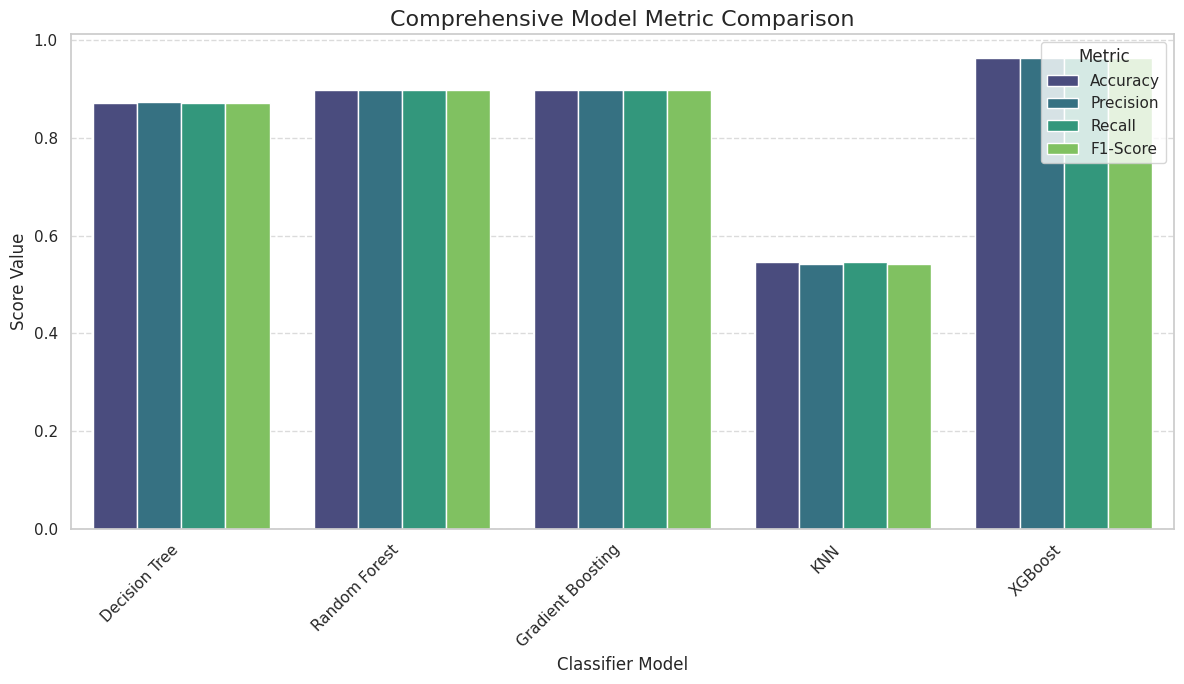

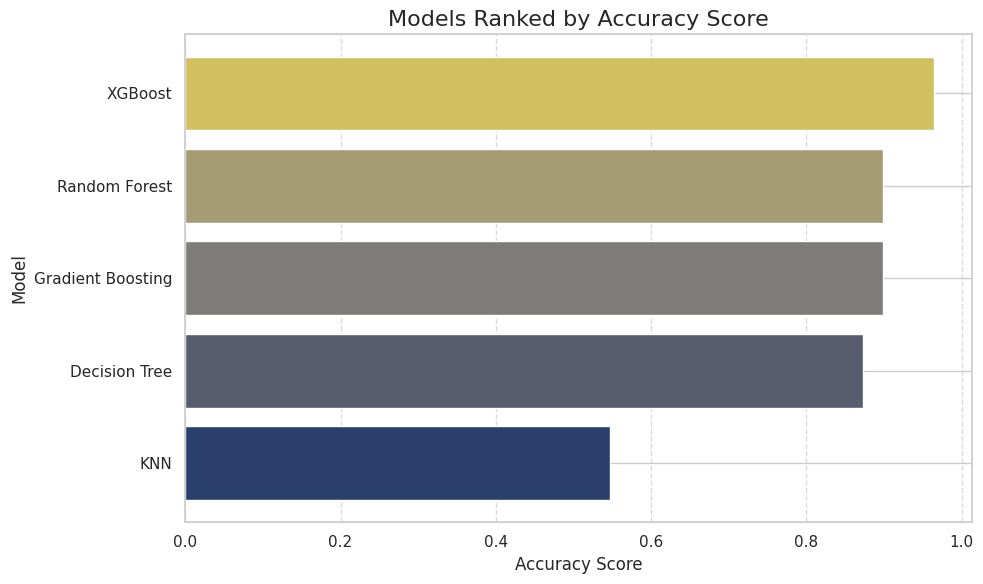

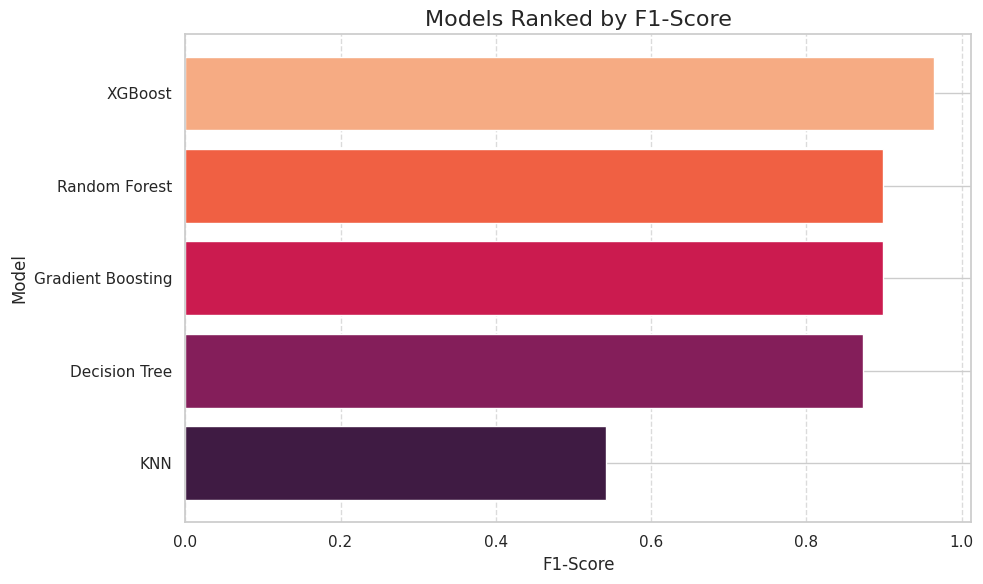

In [75]:
results = [
    {"Model": "Decision Tree",
     "Accuracy": test_accuracy_dtt_hp,
     "Precision": test_precision_dtt_hp,
     "Recall": test_recall_dtt_hp,
     "F1-Score": test_f1_dtt_hp},

    {"Model": "Random Forest",
     "Accuracy": test_accuracy_rf_hp,
     "Precision": test_precision_rf_hp,
     "Recall": test_recall_rf_hp,
     "F1-Score": test_f1_rf_hp},

    {"Model": "Gradient Boosting",
     "Accuracy": test_accuracy_gb,
     "Precision": test_precision_gb,
     "Recall": test_recall_gb,
     "F1-Score": test_f1_gb},

    {"Model": "KNN",
     "Accuracy": test_accuracy_knn_hp,
     "Precision": test_precision_knn_hp,
     "Recall": test_recall_knn_hp,
     "F1-Score": test_f1_knn_hp},

    {"Model": "XGBoost",
     "Accuracy": test_accuracy_xgb_hp,
     "Precision": test_precision_xgb_hp,
     "Recall": test_recall_xgb_hp,
     "F1-Score": test_f1_xgb_hp},
]

results_df = pd.DataFrame(results).round(4)

print("✅ Model Comparison DataFrame (results_df) Created:")
display(results_df)

# --- 2. Descriptive Statistics (MPA) ---

print("\n--- 📝 Descriptive Statistics of Model Performance Metrics ---")
display(results_df.set_index('Model').describe().round(4))

# --- 3. Key Insights ---
print("\n--- 💡 Key Insights from Model Metrics ---")

best_model = results_df.sort_values(by="F1-Score", ascending=False).iloc[0]
print(f"🥇 Best Overall Model (by F1-Score): **{best_model['Model']}** (F1-Score: {best_model['F1-Score']:.4f})")
print(f"🎯 Highest Accuracy Observed: {results_df['Accuracy'].max():.4f}")

# --- 4. Visualizations (MPA) ---

# Prepare data for Seaborn (melting wide format to long format)
results_melted = results_df.melt(id_vars='Model',
                                 var_name='Metric',
                                 value_name='Score',
                                 value_vars=['Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Visualization 1: Comprehensive Metric Comparison
plt.figure(figsize=(12, 7))
sns.barplot(x='Model', y='Score', hue='Metric', data=results_melted, palette='viridis')
plt.title('Comprehensive Model Metric Comparison', fontsize=16)
plt.ylabel('Score Value', fontsize=12)
plt.xlabel('Classifier Model', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

# --- NEW VISUALIZATION: Accuracy Ranking Plot ---
results_accuracy_ranked = results_df.sort_values(by='Accuracy', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(results_accuracy_ranked['Model'], results_accuracy_ranked['Accuracy'], color=sns.color_palette("cividis", len(results_accuracy_ranked)))
plt.title('Models Ranked by Accuracy Score', fontsize=16)
plt.xlabel('Accuracy Score', fontsize=12)
plt.ylabel('Model', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Visualization 2: Ranked F1-Score Plot
results_ranked = results_df.sort_values(by='F1-Score', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(results_ranked['Model'], results_ranked['F1-Score'], color=sns.color_palette("rocket", len(results_ranked)))
plt.title('Models Ranked by F1-Score', fontsize=16)
plt.xlabel('F1-Score', fontsize=12)
plt.ylabel('Model', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()